<a href="https://colab.research.google.com/github/AlamProgram/Machine_Learning_Project/blob/main/P3_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Libarary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#2. Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


df = pd.read_csv('')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_1 = df.drop(columns = 'Id')

## Inputasi Missing Value

In [ ]:
kolom_heatmap = df_1.select_dtypes(include = ('float', 'int'))
kolom_heatmap.info()

#hasilnya feature yang kosong adalah:
''''
LotFrontage
MasVnrArea
GarageYrBlt
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

"'\nLotFrontage\nMasVnrArea\nGarageYrBlt\n"

Sebelum inputasi, pastikan apakah masuk akal bahwa nilainya NaN

* Jika memang pada variabel tersebut memungkinkan NaN. Maka kita akan ganti menjadi 0.

* jika nilainya, tidak mungkin NaN, maka kita inputasi dengan nilai mean atau median

In [ ]:
# LotFrontage
df_1['LotFrontage'].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


 LotFrontage adalah fitur yang mengindikasikan panjang jalan yang berbatasan langsung dengan properti tersebut. Beberapa kondisi memungkinkan nilainya 0 dalam dunia nyata. Misalnya:
 1. Properti di Dalam "Cul-de-sac" atau Jalan Buntu.
 2. Akses Jalan Privat atau Gang.
 3. Properti yang tidak berbatasan langsung dengan jalan umum.

 Dengan mempertimbangkan hal ini. Maka data NaN diganti dengan 0.

In [ ]:
# LotFrontage
df_1['LotFrontage'] = df_1['LotFrontage'].fillna(0)

MasVnrArea

adalah fitur yang mengindikasikan luas area masonry veneer (pelapis dinding batu) pada properti.

Nilai 0 memungkinkan pada rumah yang tidak memiliki  dinding yang dilapisi batu.

In [ ]:
df_1['MasVnrArea'] = df_1['MasVnrArea'].fillna(0)

GarageYrBlt

 fitur numerik yang memberikan petunjuk tentang kapan garasi dibangun yang secara tidak langsung menunjukkan usia garasi.

 Nilai 0 mungkin pada rumah yang tidak memiliki garasi

In [ ]:
df_1['GarageYrBlt'] = df_1['GarageYrBlt'].fillna(0)

In [ ]:
# Drop saja variabel yang berkorelasi kurang dari 0.2
# (BedroomAbvGr, ScreenPorch, PoolArea, MoSold, #SsnPorch, BsmtFinSF3, BsmtHalfBath, MiscVal, LowQualFinSF, YrSold, OverallCond, MSSubClass, EnclosedPorch, KitchenAbvGR)
df_2 = df_1.drop(columns = ['BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'])

## Multico

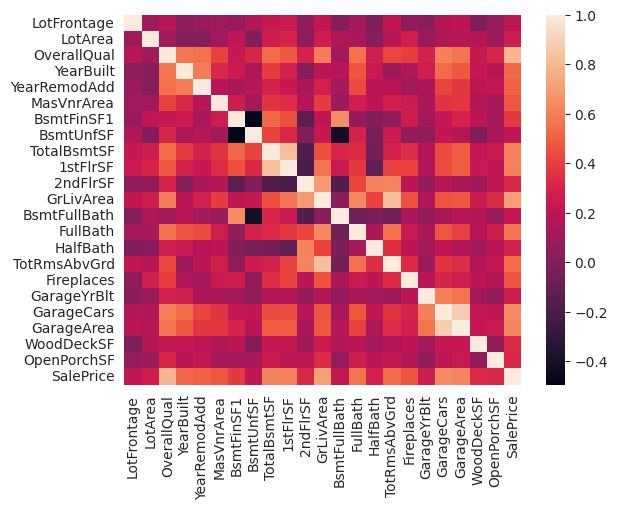

In [ ]:
# Cek Multico
# Pilih kolom numerik
numerical_columns_2 = df_2.select_dtypes(include=['float64', 'int64'])

#memebuat matrix corelasi
correlation_matrix = numerical_columns_2.corr()

#membuat heatmap
sns.heatmap(correlation_matrix)
plt.show()

In [ ]:
print(correlation_matrix)

              LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
LotFrontage      1.000000  0.100739     0.176561   0.036853      0.078686   
LotArea          0.100739  1.000000     0.105806   0.014228      0.013788   
OverallQual      0.176561  0.105806     1.000000   0.572323      0.550684   
YearBuilt        0.036853  0.014228     0.572323   1.000000      0.592855   
YearRemodAdd     0.078686  0.013788     0.550684   0.592855      1.000000   
MasVnrArea       0.105010  0.103321     0.407252   0.311600      0.176529   
BsmtFinSF1       0.076670  0.214103     0.239666   0.249503      0.128451   
BsmtUnfSF        0.160829 -0.002618     0.308159   0.149040      0.181133   
TotalBsmtSF      0.238274  0.260833     0.537808   0.391452      0.291066   
1stFlrSF         0.245181  0.299475     0.476224   0.281986      0.240379   
2ndFlrSF         0.042549  0.050986     0.295493   0.010308      0.140024   
GrLivArea        0.220347  0.263116     0.593007   0.199010      0.287389   

Variabel GarageCars dan GarageAreas berkorelasi kuat (0.88) sehingga kita drop saja (GarageCars) agar tidak terdapat Multikolinearitas

In [ ]:
df_3 = df_2.drop(columns = ['GarageCars'])

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

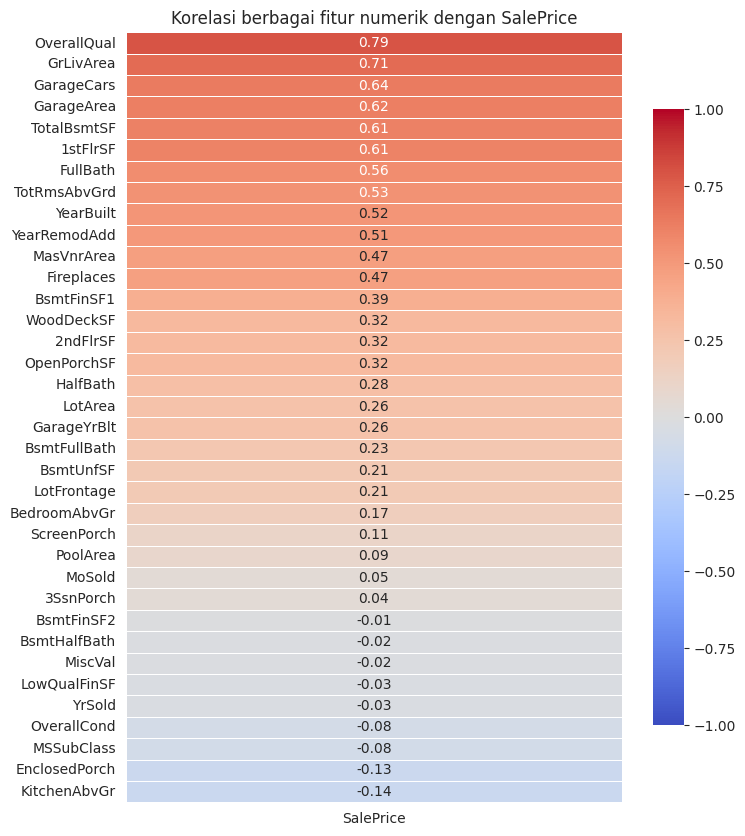

In [ ]:

# Pilih kolom numerik
numerical_columns = df_1.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi dengan SalePrice
correlation_with_sale_price = df_1[numerical_columns].corr()['SalePrice'].sort_values(ascending=False).drop('SalePrice')

# Plot correlation heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_sale_price.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 10}, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Korelasi berbagai fitur numerik dengan SalePrice')
plt.show()

In [ ]:
# menyimpan data df_3
df_3.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_3.csv', index = False)

In [4]:
#load df_3
# Multico antara  GarageCars dan GarageAreas sudah dihilangkan. Hapus GarageCars. Pakai GarageAreas
# semua missing value pada variabel numerik sudah dihandiling, menggunakan angka 0
# identifier has already been dropped

df_3 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_3.csv')

#3. EDA

##Feature Engineering
(create new feature, OHE, Label Encoding, atc)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [ ]:
categorical_columns = df_3.select_dtypes(include=['object'])
print(categorical_columns.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [ ]:
MSZoning = df_3['MSZoning'].value_counts().sort_values(ascending=False)
MSZoning

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


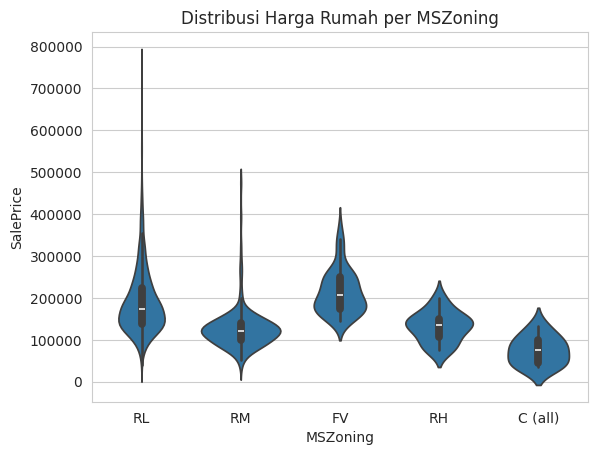

In [ ]:
# Violin plot
sns.violinplot(x='MSZoning', y='SalePrice', data=df_3, order=MSZoning.index)
plt.xlabel('MSZoning')
plt.title('Distribusi Harga Rumah per MSZoning')
plt.show()

Label Encoding

In [5]:


# FV > RL > RH > RM > C(all)

# Buat kamus (dictionary) pemetaan
pemetaan = {'FV': 5, 'RL': 4, 'RH': 3,
            'RM': 2, 'C (all)' : 1}

# Buat kolom baru dengan pemetaan
df_3['LO_MSZoning'] = df_3['MSZoning'].map(pemetaan)

df_3.head(5)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,LO_MSZoning
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,NaN,NaN,NaN,WD,Normal,208500,4
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,NaN,NaN,NaN,WD,Normal,181500,4
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,NaN,NaN,NaN,WD,Normal,223500,4
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,NaN,NaN,NaN,WD,Abnorml,140000,4
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,NaN,NaN,NaN,WD,Normal,250000,4


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [ ]:
df_3['Street'].value_counts()

,count
Street,
Pave,1454
Grvl,6


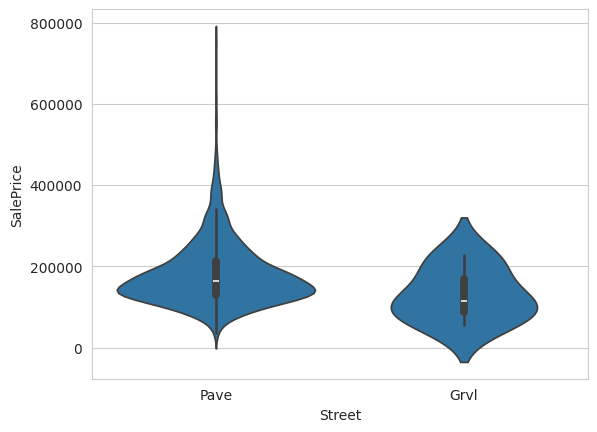

In [ ]:
# Buat Violoin Chart
sns.violinplot(x = 'Street', y= 'SalePrice', data = df_3)
plt.show()

In [ ]:
# Pave > Grvl
df_3['LO_Street'] = df_3['Street'].map({'Pave':2, 'Grvl': 1})
df_3.head(5)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,LO_MSZoning,LO_Street
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,NaN,NaN,NaN,WD,Normal,208500,4,2
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,NaN,NaN,NaN,WD,Normal,181500,4,2
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,NaN,NaN,NaN,WD,Normal,223500,4,2
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,NaN,NaN,NaN,WD,Abnorml,140000,4,2
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,NaN,NaN,NaN,WD,Normal,250000,4,2


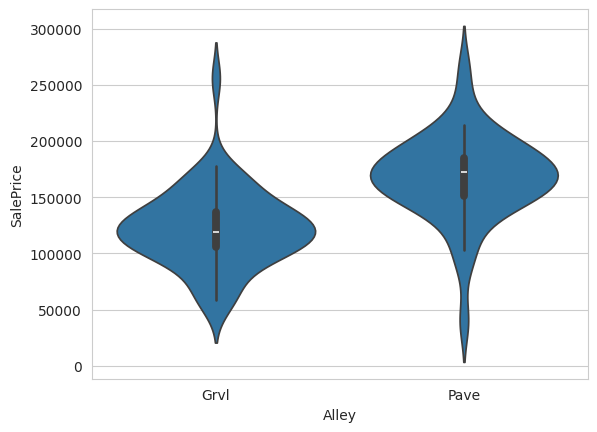

In [ ]:
sns.violinplot(x='Alley', y= 'SalePrice', data = df_3)
plt.show()

In [ ]:
df_3['Alley'].value_counts()

,count
Alley,
Grvl,50
Pave,41


In [ ]:
# Buat kolom baru dengan apply() dan lambda
df_3['LO_Alley'] = df_3['Alley'].apply(lambda x:
                                                  3 if x == 'Pave'
                                                  else 2 if x == 'Grvl'
                                                  else 1)


In [ ]:
df_3.head(4)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,LO_MSZoning,LO_Street,LO_Alley
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,61,NaN,NaN,NaN,WD,Normal,208500,4,2,1
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,WD,Normal,181500,4,2,1
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,42,NaN,NaN,NaN,WD,Normal,223500,4,2,1
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,35,NaN,NaN,NaN,WD,Abnorml,140000,4,2,1


In [ ]:
# menghitung jumlah data per kategori
df_3['LotShape'].value_counts()

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


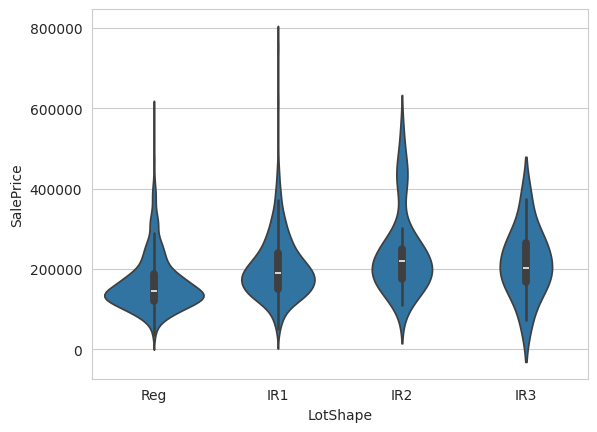

In [ ]:
#Mke a violinplot
sns.violinplot(x='LotShape', y = 'SalePrice', data = df_3)
sns.set_style('darkgrid')
plt.show()

In [ ]:
# IR2 > IR3 > IR1 > Reg
df_3['LO_LotShape'] = df_3['LotShape'].map({'IR2':4, 'IR3': 3, 'IR1':2, 'Reg':4 })

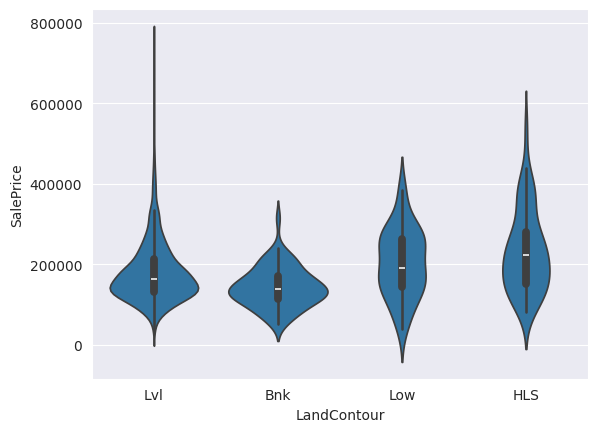

In [ ]:
sns.violinplot(x  = 'LandContour', y ='SalePrice' , data = df_3)
sns.set_style('darkgrid')
plt.show()

In [ ]:
# HLS > Low > Lvl > Bnk
sd_LO_LandContour = {
    'HLS': 4,
    'Low': 3,
    'Lvl': 2,
    'Bnk': 1
}
df_3['LO_LandContour'] = df_3['LandContour'].map(sd_LO_LandContour)

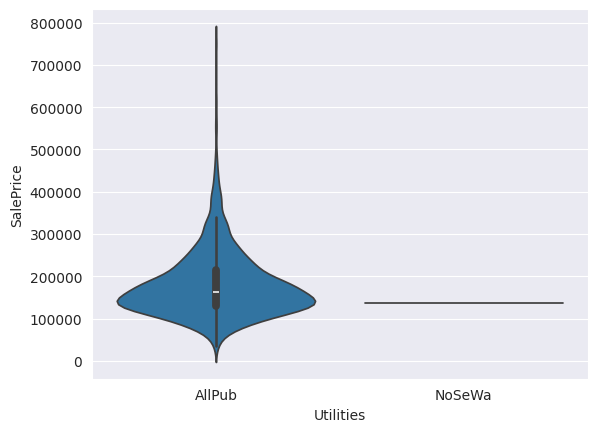

In [ ]:
sns.violinplot(x= 'Utilities', y = 'SalePrice', data = df_3)
sns.set_style('darkgrid')
plt.show()

In [ ]:
df_3['Utilities'].value_counts()

,count
Utilities,
AllPub,1459
NoSeWa,1


In [ ]:
df_4 = df_3.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities'])

In [ ]:
df_4.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_4.csv', index = False)

In [ ]:
df_4  = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_4.csv')

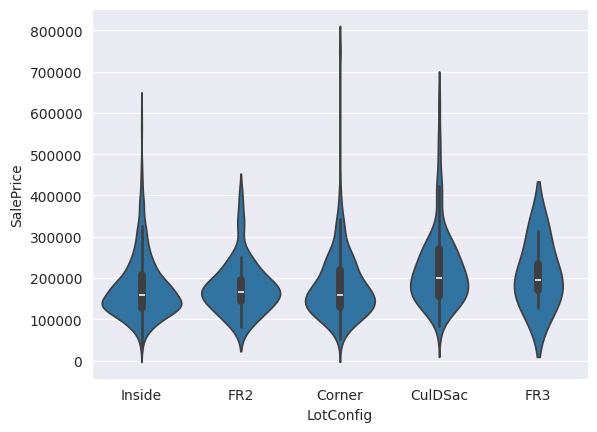

In [ ]:
 #LotConfig
 sns.violinplot(x = 'LotConfig', y = "SalePrice", data = df_4)
 sns.set_style('darkgrid')
 plt.show()

In [ ]:
def map_lot_config(lot_config):
    if lot_config == 'FR3' or lot_config == 'CulDSac':
        return 2
    else:
        return 1  # Atau nilai default lain jika ada kategori lain

df_4['LO_LotConfig'] = df_4['LotConfig'].apply(map_lot_config)

In [ ]:
# hypotesis testing, anova

In [ ]:
df_4.head(4)

,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,MiscFeature,SaleType,SaleCondition,SalePrice,LO_MSZoning,LO_Street,LO_Alley,LO_LotShape,LO_LandContour,LO_LotConfig
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,NaN,WD,Normal,208500,4,2,1,4,2,1
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,NaN,WD,Normal,181500,4,2,1,4,2,1
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,NaN,WD,Normal,223500,4,2,1,2,2,1
3,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,NaN,WD,Abnorml,140000,4,2,1,2,2,1


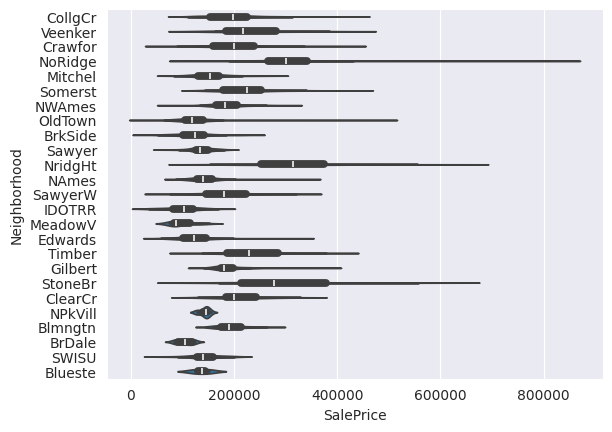

In [ ]:
# Neighborhood

sns.violinplot(x ='SalePrice' , y = 'Neighborhood', data = df_4)
sns.set_style('darkgrid')
plt.show()

In [ ]:
df_4['Neighborhood'].value_counts()

,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


In [ ]:
# Hitung rata-rata harga per jenis
rata_rata_harga = df_4.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

rata_rata_harga

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


In [ ]:
# Hitung rata-rata harga per Neighborhood dan urutkan
rata_rata_harga = df_4.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Buat kamus pemetaan berdasarkan urutan rata-rata harga
pemetaan = {kategori: indeks for indeks, kategori in enumerate(rata_rata_harga.index)}

# Terapkan pemetaan ke kolom Neighborhood
df_4['LO_Neighborhood'] = df_4['Neighborhood'].map(pemetaan)

In [ ]:
df_4.head(3)

,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,SaleType,SaleCondition,SalePrice,LO_MSZoning,LO_Street,LO_Alley,LO_LotShape,LO_LandContour,LO_LotConfig,LO_Neighborhood
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,WD,Normal,208500,4,2,1,4,2,1,8
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,WD,Normal,181500,4,2,1,4,2,1,4
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,WD,Normal,223500,4,2,1,2,2,1,8


In [ ]:
# Condition1
df_4['Condition1'].value_counts()

,count
Condition1,
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


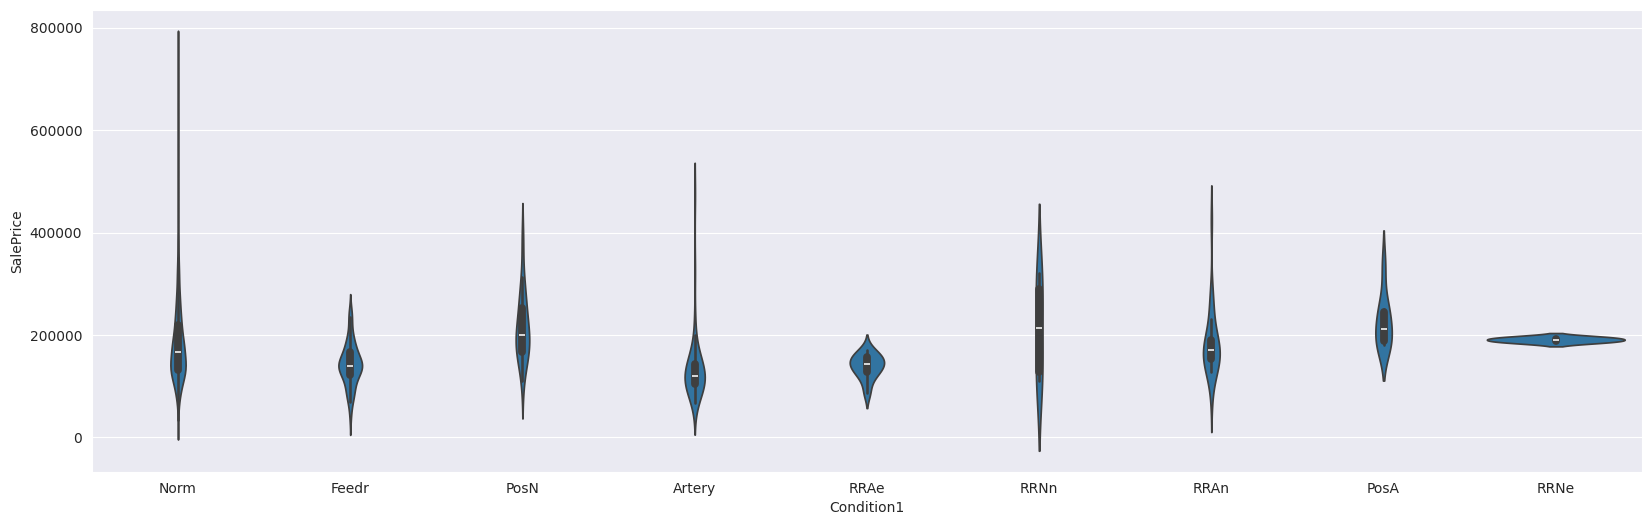

In [ ]:
plt.figure(figsize = (20,6))
sns.violinplot(x = 'Condition1', y = 'SalePrice', data = df_4)
sns.set_style('darkgrid')
plt.show()

In [ ]:
print(df_4['Condition1'].unique())

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


In [ ]:
# Hitung rata-rata harga per Condition1 dan urutkan
rata_rata_harga = df_4.groupby('Condition1')['SalePrice'].mean().sort_values(ascending=False)

In [ ]:
def Fungsi_Con1(Condition1):
    if Condition1 == 'RRNe' or Condition1 == 'PosA':
        return 2
    else:
        return 1


df_4['LO_Condition1'] = df_4['Condition1'].apply(Fungsi_Con1)

In [ ]:
df_4.head(5)

,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,SaleCondition,SalePrice,LO_MSZoning,LO_Street,LO_Alley,LO_LotShape,LO_LandContour,LO_LotConfig,LO_Neighborhood,LO_Condition1
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,Normal,208500,4,2,1,4,2,1,8,1
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,Normal,181500,4,2,1,4,2,1,4,1
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,Normal,223500,4,2,1,2,2,1,8,1
3,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,Abnorml,140000,4,2,1,2,2,1,7,1
4,84.0,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,Normal,250000,4,2,1,2,2,1,0,1


In [ ]:
rata_rata_harga

,SalePrice
Condition1,
PosA,225875.000000
PosN,215184.210526
RRNn,212400.000000
RRNe,190750.000000
Norm,184495.492063
RRAn,184396.615385
Feedr,142475.481481
RRAe,138400.000000
Artery,135091.666667


In [ ]:
df_4['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [ ]:
# Coba Kombinasikan Condition1 dgn Condition2
df_4['Con1_Con2'] = df_4['Condition1'] + "_" + df_4['Condition2']

In [ ]:
df_4['Con1_Con2'].value_counts()

,count
Con1_Con2,
Norm_Norm,1260
Feedr_Norm,76
Artery_Norm,45
RRAn_Norm,22
PosN_Norm,17
RRAe_Norm,11
PosA_Norm,8
RRNn_Norm,4
RRAn_Feedr,4


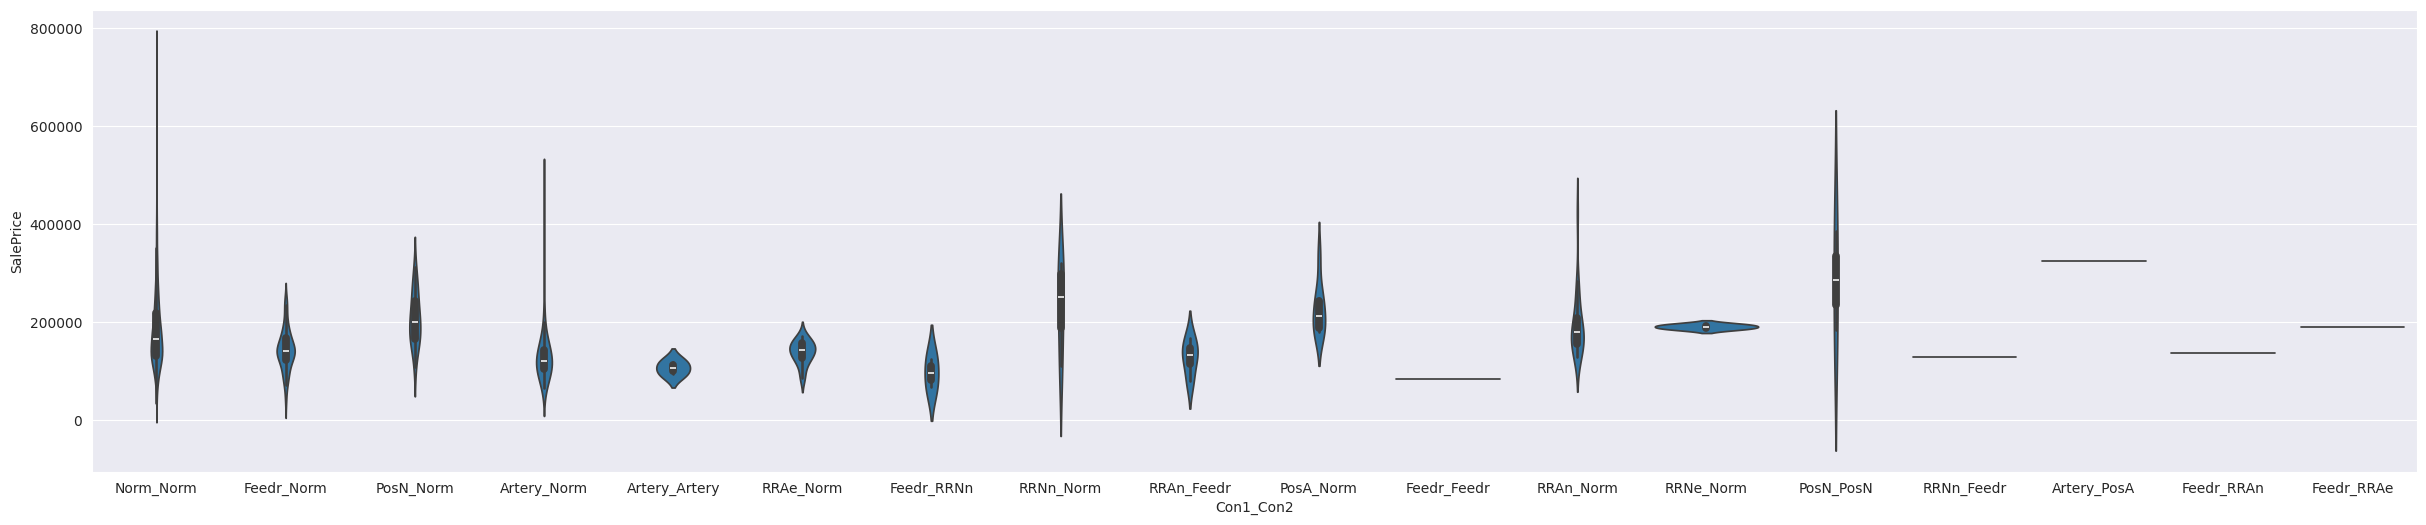

In [ ]:
plt.figure(figsize = (30,6))
sns.violinplot(x = 'Con1_Con2', y = 'SalePrice', data = df_4)
sns.set_style('darkgrid')
plt.show()

In [ ]:
# Hitung rata-rata harga per Condition1 dan urutkan
rata_rata_harga = df_4.groupby('Con1_Con2')['SalePrice'].mean().sort_values(ascending=False)

In [ ]:
def Fungsi_Con1_Con2(Con1_Con2):
    if Con1_Con2 == 'Artery_PosA':
        return 1
    elif Con1_Con2 == 'PosN_PosN':
        return 2
    elif Con1_Con2 == 'RRNn_Norm' or Con1_Con2 == 'PosA_Norm':
        return 3
    elif Con1_Con2 == 'PosN_Norm' or Con1_Con2 == 'RRAn_Norm' or Con1_Con2 == 'RRNe_Norm' or Con1_Con2 ==  'Feedr_Norm' or Con1_Con2 == 'Norm_Norm':
        return 4
    elif Con1_Con2 == 'Feedr_RRNn' or Con1_Con2 == 'Feedr_Feedr':
        return 6
    else:
        return 5


In [ ]:
df_4['LO_Con1_Con2'] = df_4['Con1_Con2'].apply(Fungsi_Con1_Con2)

In [ ]:
rata_rata_harga

,SalePrice
Con1_Con2,
Artery_PosA,325000.000000
PosN_PosN,284875.000000
RRNn_Norm,233500.000000
PosA_Norm,225875.000000
PosN_Norm,206985.294118
RRAn_Norm,194559.636364
RRNe_Norm,190750.000000
Feedr_RRAe,190000.000000
Norm_Norm,184495.492063


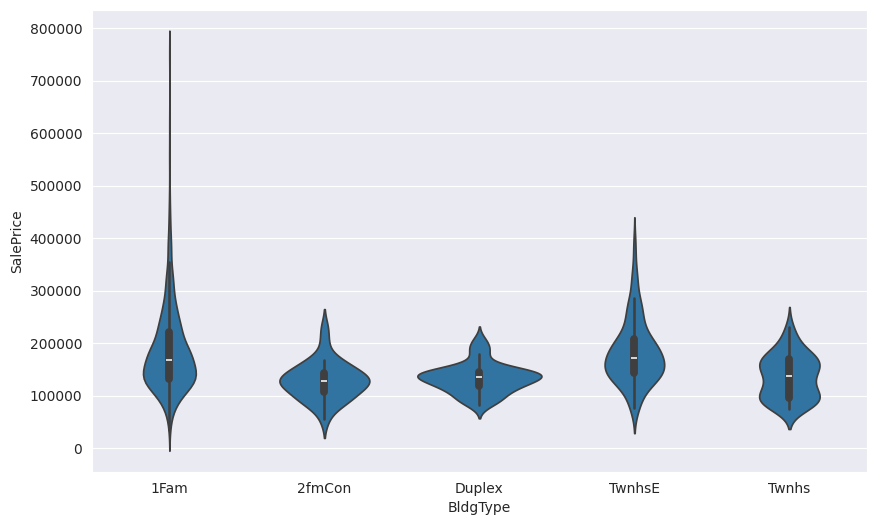

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'BldgType', y = 'SalePrice', data  = df_4)
sns.set_style('darkgrid')
plt.show()

In [ ]:
# Hitung rata-rata harga per Condition1 dan urutkan
rata_rata_harga = df_4.groupby('BldgType')['SalePrice'].mean().sort_values(ascending=False)

In [ ]:
df_4['BldgType'].value_counts()
#

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


In [ ]:
rata_rata_harga

,SalePrice
BldgType,
1Fam,185763.807377
TwnhsE,181959.342105
Twnhs,135911.627907
Duplex,133541.076923
2fmCon,128432.258065


In [ ]:
def Fungsi_BldgType(BldgType):
    if BldgType == '1Fam' or BldgType == 'TwnhsE':
        return 1
    elif BldgType == 'Duplex' or BldgType == 'Twnhs' :
        return 2
    elif BldgType == '2fmCon':
        return 3

In [ ]:
df_4['LO_BldgType'] = df_4['BldgType'].apply(Fungsi_BldgType)

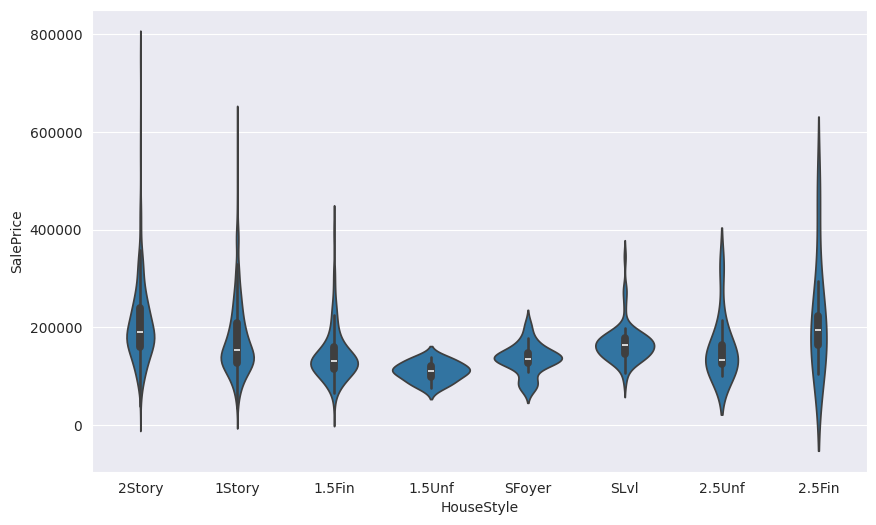

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'HouseStyle', y = 'SalePrice', data = df_4)
sns.set_style('darkgrid')
plt.show()

In [ ]:
rata_rata_harga = df_4.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=False)

In [ ]:
rata_rata_harga

,SalePrice
HouseStyle,
2.5Fin,220000.000000
2Story,210051.764045
1Story,175985.477961
SLvl,166703.384615
2.5Unf,157354.545455
1.5Fin,143116.740260
SFoyer,135074.486486
1.5Unf,110150.000000


In [ ]:
df_4['HouseStyle'].value_counts()

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


In [ ]:
def Fungsi_HStyle(HouseStyle):
    if HouseStyle == '2.5Fin':
        return 1
    elif HouseStyle == '2Story':
        return 2
    elif HouseStyle == '1Story':
        return 3
    elif HouseStyle == 'SLvl':
        return 4
    elif HouseStyle == '2.5Unf':
        return 5
    elif HouseStyle == '1.5Fin':
        return 6
    elif HouseStyle == 'SFoyer':
        return 7
    else:
        return 8

In [ ]:
df_4['LO_HouseStyle'] = df_4['HouseStyle'].apply(Fungsi_HStyle)

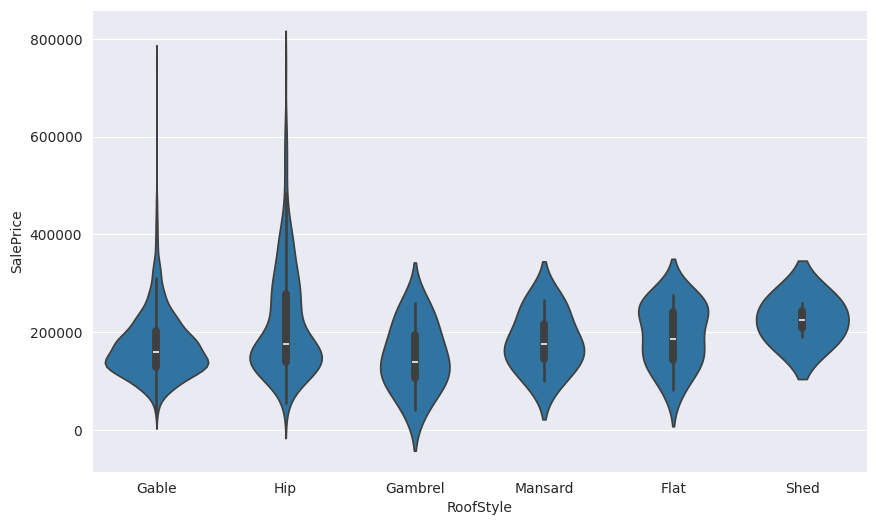

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'RoofStyle', y = 'SalePrice', data = df_4)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_4.groupby('RoofStyle')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
RoofStyle,
Shed,225000.000000
Hip,218876.933566
Flat,194690.000000
Mansard,180568.428571
Gable,171483.956179
Gambrel,148909.090909


In [ ]:
def Fungsi_RoofStyle(RoofStyle):
    if RoofStyle == 'Gable':
        return 1
    elif RoofStyle == 'Shed' or RoofStyle == 'Hip':
        return 2
    elif RoofStyle == 'Flat':
        return 3
    elif RoofStyle == 'Mansard':
        return 3
    elif RoofStyle == 'Gable':
        return 3
    elif RoofStyle == 'Gambrel':
        return 3


In [ ]:
df_4['LO_RoofStyle'] = df_4['RoofStyle'].apply(Fungsi_RoofStyle)

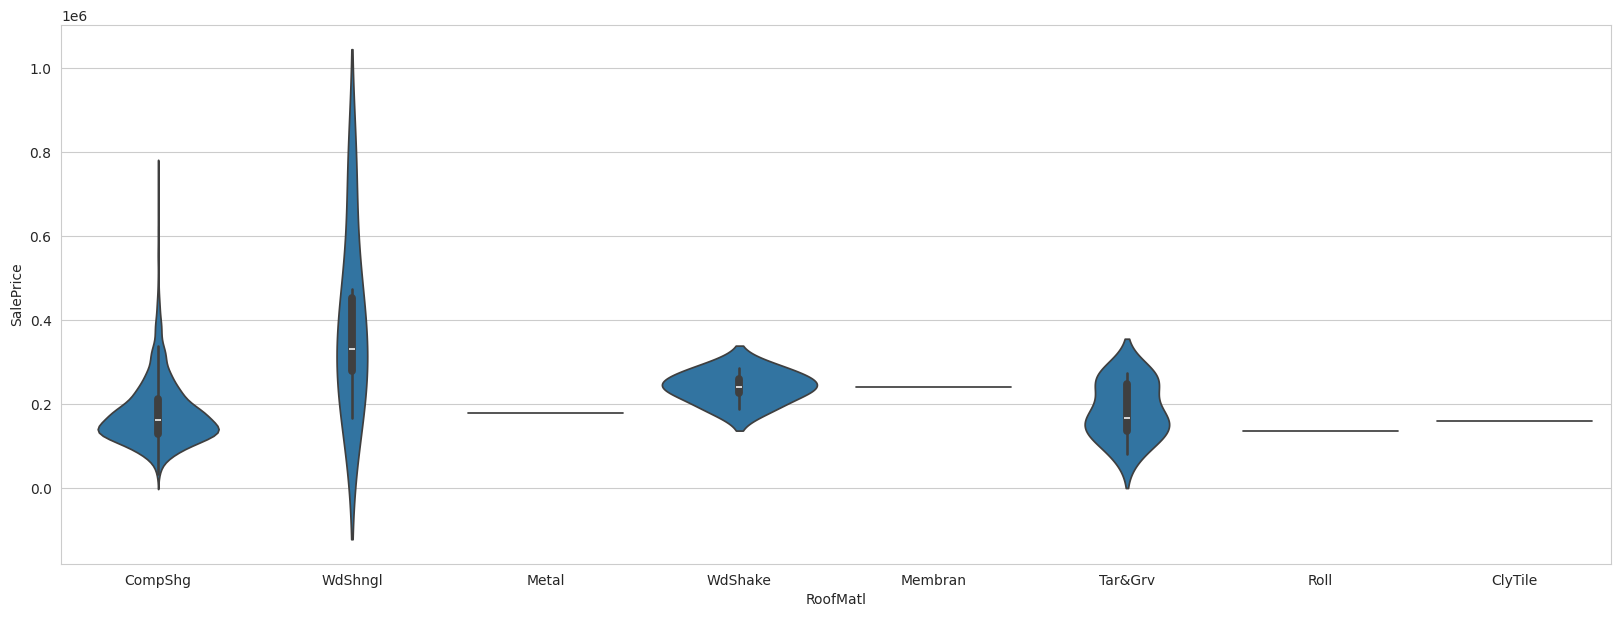

In [ ]:
plt.figure(figsize = (20,7))
sns.violinplot(x  = 'RoofMatl', y = 'SalePrice', data = df_4)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_4.groupby('RoofMatl')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga


,SalePrice
RoofMatl,
WdShngl,390250.000000
Membran,241500.000000
WdShake,241400.000000
Tar&Grv,185406.363636
Metal,180000.000000
CompShg,179803.679219
ClyTile,160000.000000
Roll,137000.000000


In [ ]:
def Fungsi_RoofMatl(RoofMatl):
    if RoofMatl == 'WdShngl':
        return 1
    elif RoofMatl == 'Membran' or RoofMatl == 'WdShake':
        return 2
    elif RoofMatl == 'Tar&Grv' or RoofMatl == 'Metal' or RoofMatl == 'CompShg':
        return 2
    elif RoofMatl == 'ClyTile':
        return 2
    else:
        return 3

In [ ]:
df_4['RoofMatl'] = df_4['RoofMatl'].apply(Fungsi_RoofMatl)

Karena isi kolom Exterior1st dan Exterior2nd sama,
Kita gabung kombinasi keduanya menjadi 1 kolom

In [ ]:
df_4['Ext1_Ext2'] = df_4['Exterior1st'] + "_" + df_4['Exterior2nd']

In [ ]:
rata_rata_harga = df_4.groupby('Ext1_Ext2')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
Ext1_Ext2,
CemntBd_Wd Shng,538000.000000
Wd Sdng_ImStucc,405333.333333
Stucco_CmentBd,378500.000000
VinylSd_ImStucc,320000.000000
VinylSd_Other,319000.000000
...,...
AsbShng_Stucco,87000.000000
WdShing_Wd Sdng,87000.000000
MetalSd_Stucco,85000.000000


In [ ]:
# Buat kamus pemetaan berdasarkan urutan rata-rata harga
pemetaan = {kategori: indeks for indeks, kategori in enumerate(rata_rata_harga.index)}

def Fungsi_Ext1_Ext2(Ext1_Ext2, pemetaan):
    if Ext1_Ext2 in pemetaan:
        return pemetaan[Ext1_Ext2]
    else:
        return 68                       # agar kombinasi lainnya yg tidak ada di dalam dataset juga dapat masuk dalam model

In [ ]:
df_4['LO_Ext1_Ext2'] = df_4['Ext1_Ext2'].map(pemetaan)

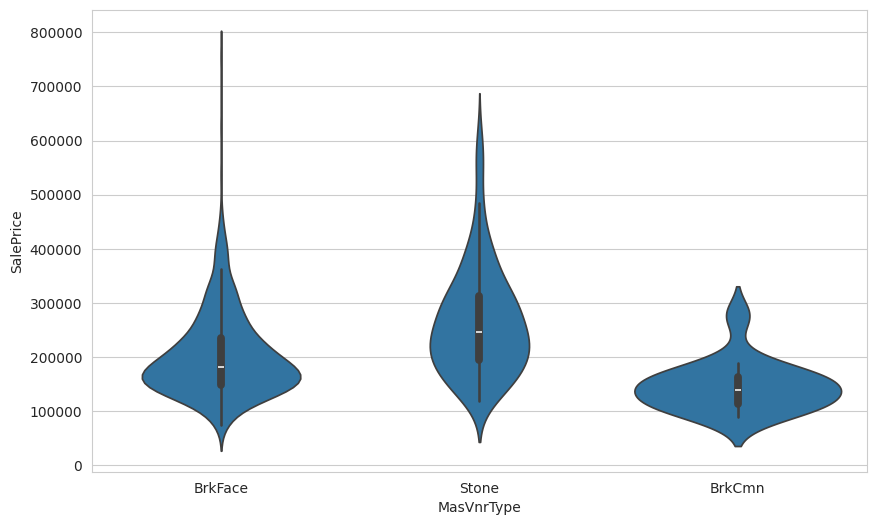

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'MasVnrType', y = 'SalePrice', data = df_4)
sns.set_style('whitegrid')
plt.show()

In [ ]:
df_4['MasVnrType'] = df_4['MasVnrType'].fillna('No_MasVnr')

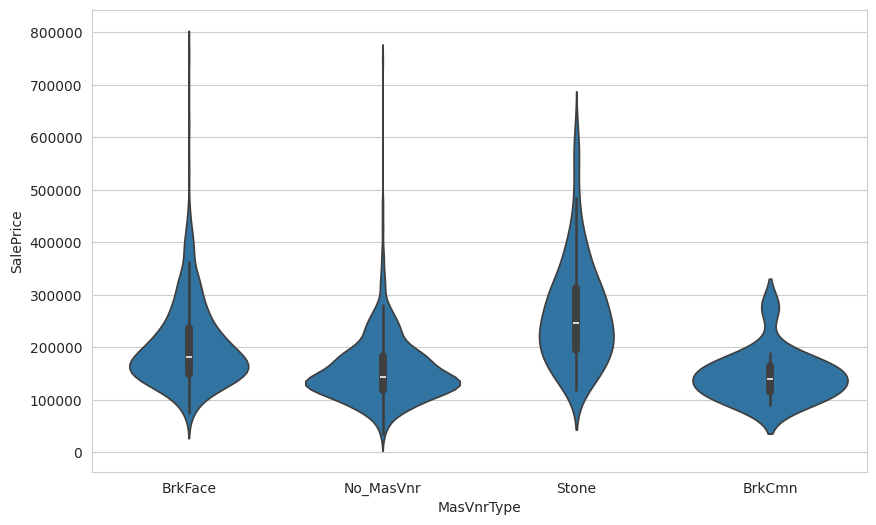

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'MasVnrType', y = 'SalePrice', data = df_4)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_4.groupby('MasVnrType')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
MasVnrType,
Stone,265583.625000
BrkFace,204691.871910
No_MasVnr,156958.243119
BrkCmn,146318.066667


In [ ]:
df_4.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_5.csv', index = False)

In [ ]:
df_5 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_5.csv')

In [ ]:
df_5['ExterQual'].value_counts()

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


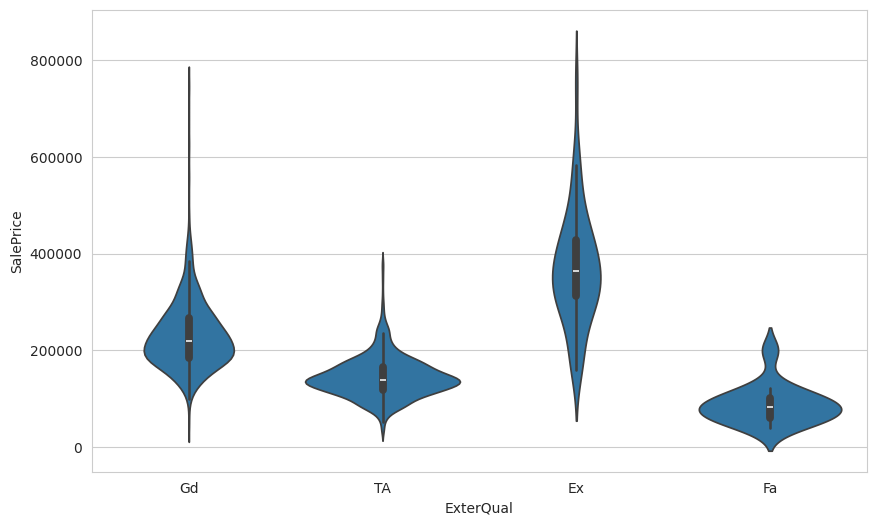

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'ExterQual', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_externalQual(ExterQual):
    if ExterQual == 'Ex':
        return 1
    elif ExterQual == 'Gd':
        return 2
    elif ExterQual == 'TA':
        return 3
    else:
        return 4


In [ ]:
df_5['LO_ExterQual'] = df_5['ExterQual'].apply(Fungsi_externalQual)

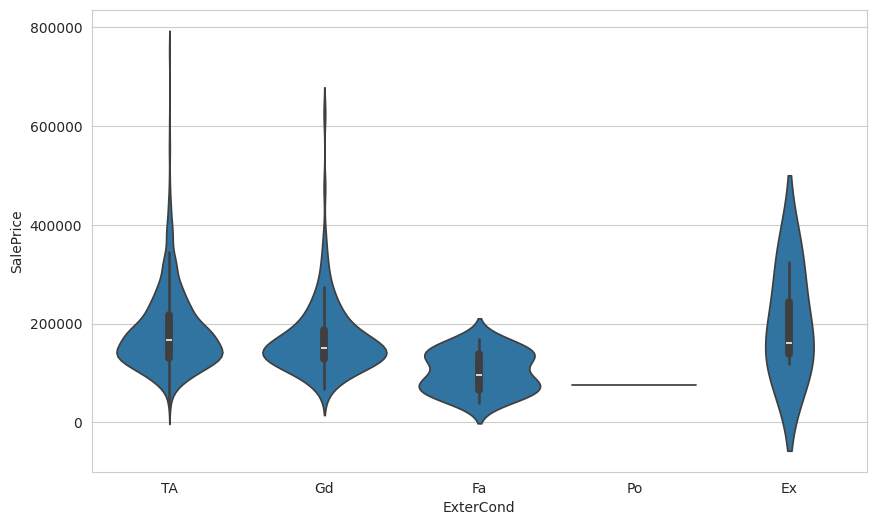

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'ExterCond', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_externalCond(ExterCond):
    if ExterCond == 'Ex':
        return 1
    elif ExterCond == 'Gd':
        return 2
    elif ExterCond == 'TA':
        return 3
    elif ExterCond == 'Fa':
        return 3
    else:
        return 4

In [ ]:
df_5['LO_ExterCond'] = df_5['ExterCond'].apply(Fungsi_externalCond)

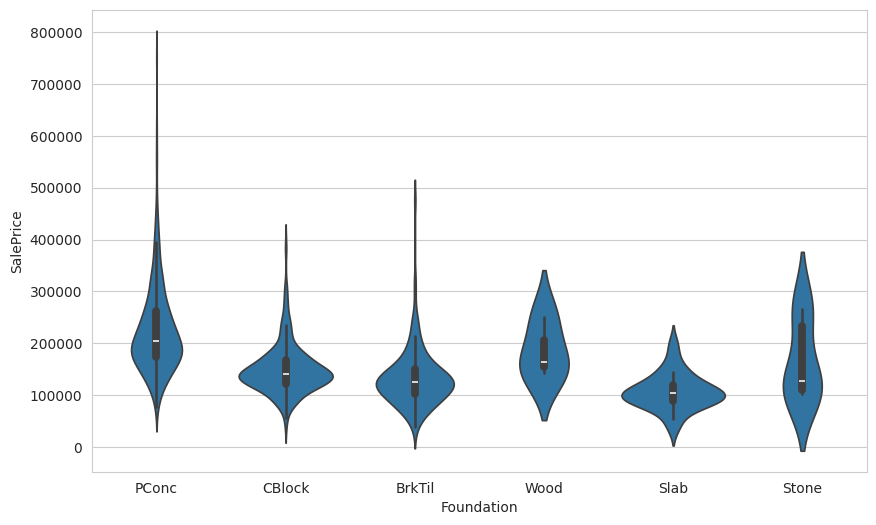

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Foundation', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_5.groupby('Foundation')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
Foundation,
PConc,225230.442040
Wood,185666.666667
Stone,165959.166667
CBlock,149805.714511
BrkTil,132291.075342
Slab,107365.625000


In [ ]:
pemetaan = {kategori: indeks for indeks, kategori in enumerate(rata_rata_harga.index)}

In [ ]:
df_5['LO_Foundation'] = df_5['Foundation'].map(pemetaan)

In [ ]:
df_5['BsmtQual'].fillna('No_Bsmt', inplace = True)

<ipython-input-1218-68e9ebb279f6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_5['BsmtQual'].fillna('No_Bsmt', inplace = True)


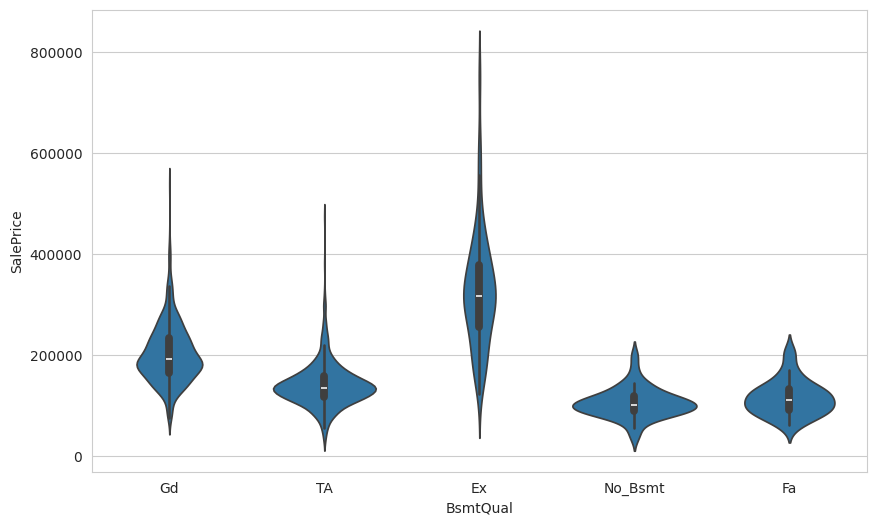

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'BsmtQual', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_BsmtQual(BsmtQual):
    if BsmtQual == 'Ex':
        return 1
    elif BsmtQual == 'Gd':
        return 2
    elif BsmtQual == 'TA':
        return 3
    elif BsmtQual == 'Fa':
        return 4
    else:
        return 5

In [ ]:
df_5['LO_BsmtQual'] = df_5['BsmtQual'].apply(Fungsi_BsmtQual)

BsmtCond

In [ ]:
df_5['BsmtCond'].fillna('No_Bsmt', inplace = True)

<ipython-input-1222-32d5ac106f84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_5['BsmtCond'].fillna('No_Bsmt', inplace = True)


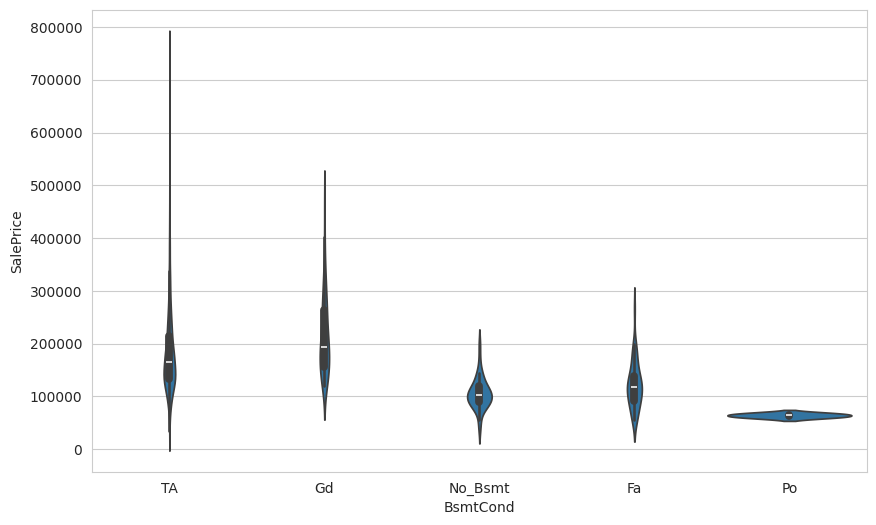

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'BsmtCond', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_BsmtCond(BsmtCond):
    if BsmtCond == 'Ex':
        return 1
    elif BsmtCond == 'Gd':
        return 2
    elif BsmtCond == 'TA':
        return 3
    elif BsmtCond == 'Fa':
        return 4
    elif BsmtCond == 'No_Bsmt':
        return 5
    elif BsmtCond == 'Po':
        return 6


df_5['LO_BsmtQual'] = df_5['BsmtQual'].apply(Fungsi_BsmtQual)


In [ ]:
df_5.head(10)

,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,LO_Con1_Con2,LO_BldgType,LO_HouseStyle,LO_RoofStyle,Ext1_Ext2,LO_Ext1_Ext2,LO_ExterQual,LO_ExterCond,LO_Foundation,LO_BsmtQual
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,4,1,2,1,VinylSd_VinylSd,15,2,3,0,2
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,4,1,3,1,MetalSd_MetalSd,30,3,3,3,2
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,4,1,2,1,VinylSd_VinylSd,15,2,3,0,2
3,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,4,1,2,1,Wd Sdng_Wd Shng,38,3,3,4,3
4,84.0,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,4,1,2,1,VinylSd_VinylSd,15,2,3,0,2
5,85.0,14115,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,...,4,1,6,1,VinylSd_VinylSd,15,3,3,1,2
6,75.0,10084,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,...,4,1,3,1,VinylSd_VinylSd,15,2,3,0,1
7,0.0,10382,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,...,4,1,2,1,HdBoard_HdBoard,24,3,3,3,2
8,51.0,6120,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,...,5,1,6,1,BrkFace_Wd Shng,49,3,3,4,3
9,50.0,7420,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,...,5,3,8,1,MetalSd_MetalSd,30,3,3,4,3


In [ ]:
df_5['BsmtExposure'].value_counts()

,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114


BsmtExposure

In [ ]:
df_5['BsmtExposure'] = df_5['BsmtExposure'].fillna('No_Bsmt')

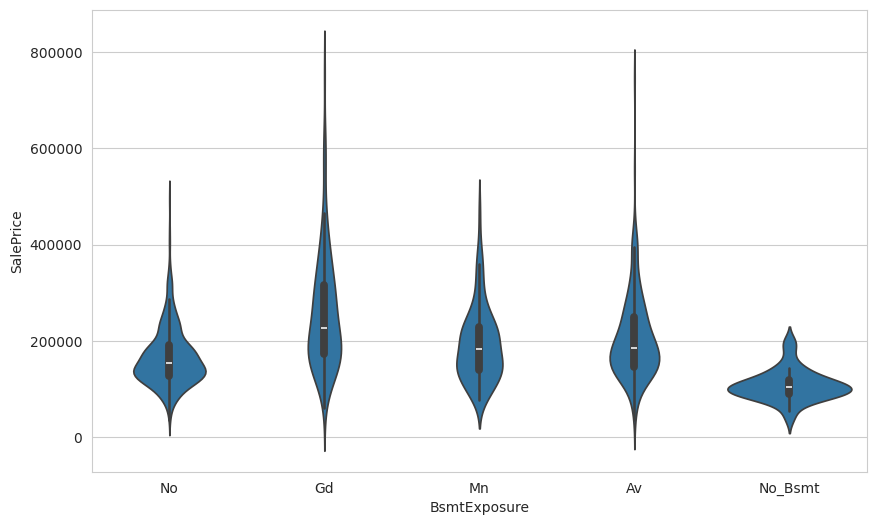

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'BsmtExposure', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_BsmtExposure(BsmtExposure):
    if BsmtExposure == 'Gd':
        return 1
    elif BsmtExposure == 'Av':
        return 2
    elif BsmtExposure == 'Mn':
        return 3
    elif BsmtExposure == 'No':
        return 4
    elif BsmtExposure == 'No_Bsmt':
        return 5

In [ ]:
df_5['LO_BsmtExp'] = df_5['BsmtExposure'].apply(Fungsi_BsmtExposure)

BsmtFinType1

In [ ]:
df_5['BsmtFinType1'] =df_5['BsmtFinType1'].fillna('No_Bsmt')

In [ ]:
df_5['BsmtFinType1'].value_counts()

,count
BsmtFinType1,
Unf,430
GLQ,418
ALQ,220
BLQ,148
Rec,133
LwQ,74
No_Bsmt,37


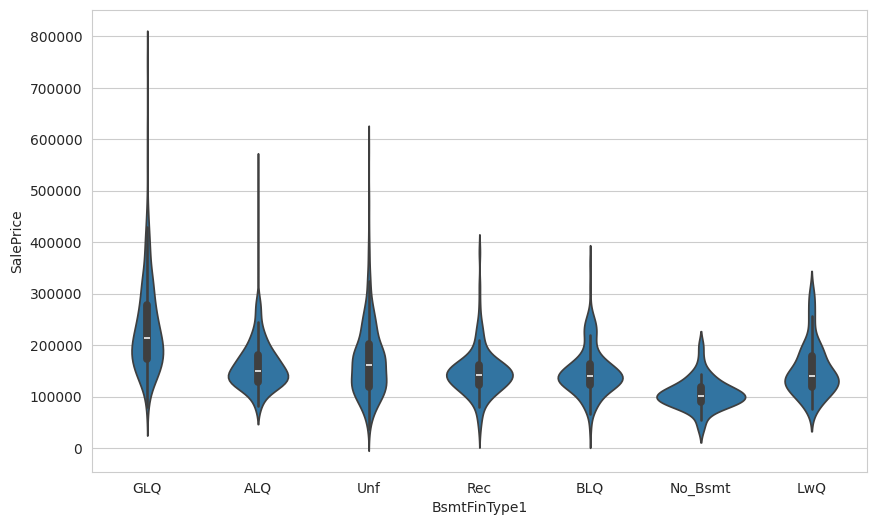

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'BsmtFinType1', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_5.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
BsmtFinType1,
GLQ,235413.720096
Unf,170670.576744
ALQ,161573.068182
LwQ,151852.702703
BLQ,149493.655405
Rec,146889.248120
No_Bsmt,105652.891892


In [ ]:
def Fungsi_BsmtFType1(BsmtType1):
    if BsmtType1 == 'GLQ':
        return 1
    elif BsmtType1 == 'Unf':
        return 2
    elif BsmtType1 == 'ALQ':
        return 3
    elif BsmtType1 == 'LwQ' or BsmtType1 == 'BLQ':
        return 4
    elif BsmtType1 == 'Rec':
        return 5
    elif BsmtType1 == 'No_Bsmt':
        return 6

In [ ]:
df_5['LO_BsmtFType1'] = df_5['BsmtFinType1'].apply(Fungsi_BsmtFType1)

In [ ]:
df_5['BsmtFinType2'] = df_5['BsmtFinType2'].fillna("No_Bsmt")

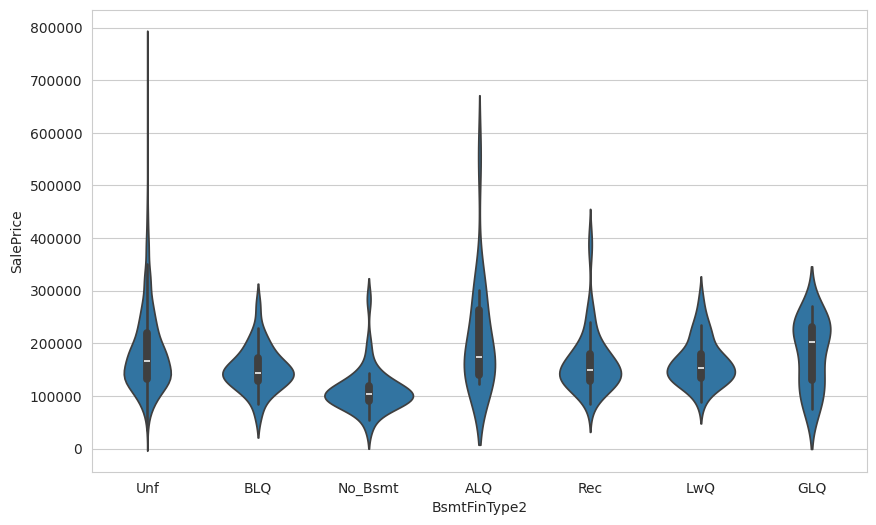

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'BsmtFinType2', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_5.groupby('BsmtFinType2')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
BsmtFinType2,
ALQ,209942.105263
Unf,184694.690287
GLQ,180982.142857
Rec,164917.129630
LwQ,164364.130435
BLQ,151101.000000
No_Bsmt,110346.236842


In [ ]:
def Fungsi_BsmtFinType2(BsmtFinType2):
    if BsmtFinType2 == 'ALQ':
        return 1
    elif BsmtFinType2 == 'Unf' or BsmtFinType2 == 'GLQ':
        return 2
    elif BsmtFinType2 == 'Rec' or BsmtFinType2 == 'LwQ':
        return 3
    elif BsmtFinType2 == 'BLQ':
        return 4
    elif BsmtFinType2 == 'No_Bsmt':
        return 5

In [ ]:
df_5['LO_BsmtFinType2'] = df_5['BsmtFinType2'].apply(Fungsi_BsmtFinType2)

Heating

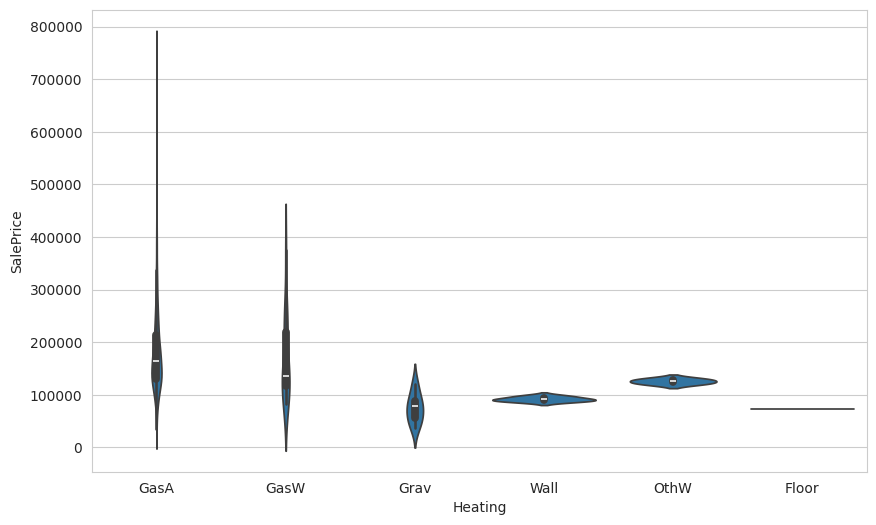

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Heating', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_5.groupby('Heating')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
Heating,
GasA,182021.195378
GasW,166632.166667
OthW,125750.000000
Wall,92100.000000
Grav,75271.428571
Floor,72500.000000


In [ ]:
def Fungsi_Heating(Heating):
    if Heating == 'GasA':
        return 1
    elif Heating == 'GasW':
        return 2
    elif Heating == 'OthW':
        return 3
    elif Heating == 'Wall':
        return 4
    elif Heating == 'Grav':
        return 5
    elif Heating == 'Floor':
        return 6

In [ ]:
df_5['LO_heating'] = df_5['Heating'].apply(Fungsi_Heating)

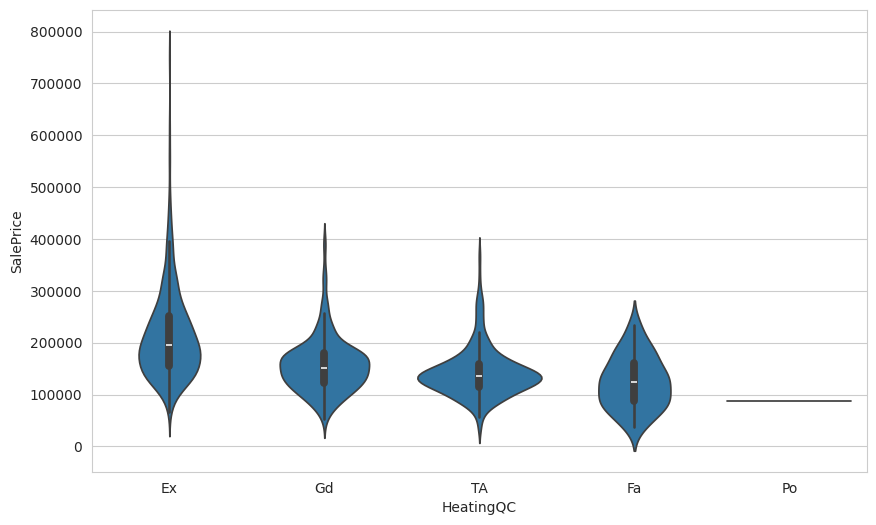

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'HeatingQC', y = 'SalePrice', data = df_5)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_5.groupby('HeatingQC')['SalePrice'].mean().sort_values(ascending  = False)
rata_rata_harga

,SalePrice
HeatingQC,
Ex,214914.429150
Gd,156858.871369
TA,142362.876168
Fa,123919.489796
Po,87000.000000


In [ ]:
def Fungsi_HeatingQC(HeatingQC):
    if HeatingQC == 'Ex':
        return 1
    elif HeatingQC == 'Gd':
        return 2
    elif HeatingQC == 'TA':
        return 3
    elif HeatingQC == 'Fa':
        return  4
    elif HeatingQC == 'Po':
        return 5

In [ ]:
df_5['LO_HeatingQC'] = df_5['HeatingQC'].apply(Fungsi_HeatingQC)

In [ ]:
df_5.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_6.csv', index = False)

In [ ]:
df_6 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_6.csv')

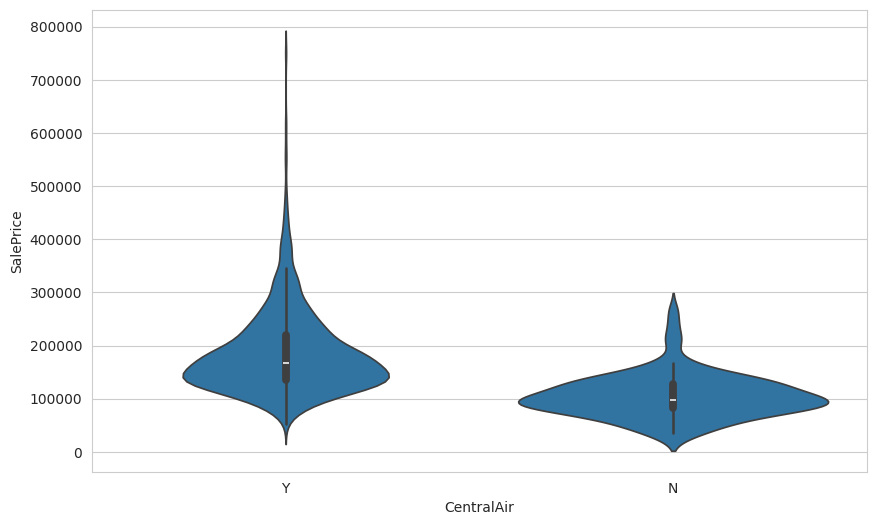

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'CentralAir', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
df_6['LO_CentralAir'] = df_6['CentralAir'].map({'Y': 1, 'N': 0})

In [ ]:
df_6['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
df_6['Electrical'].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
# Data nan diganti dengan modus
df_6['Electrical'] = df_6['Electrical'].fillna('SBrkr')

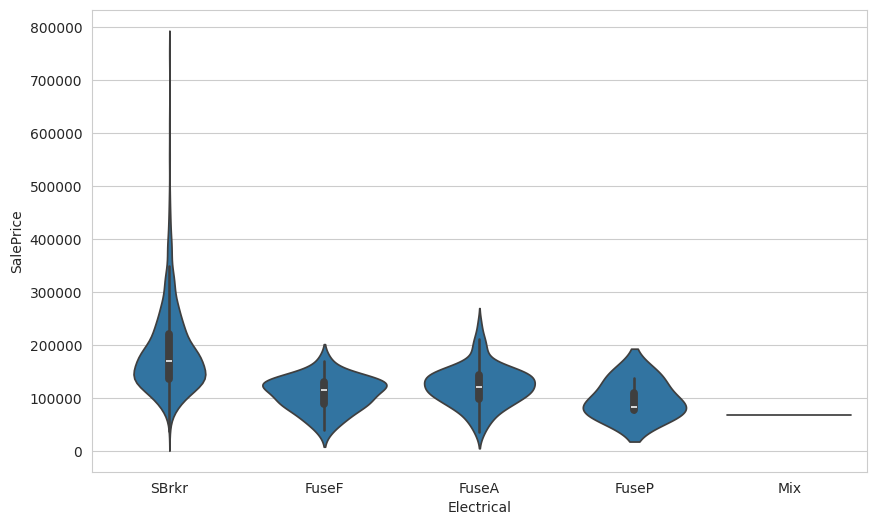

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Electrical', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_Electrical(Electrical):
    if Electrical == 'SBrkr':
        return 1
    elif Electrical == 'FuseA' or Electrical == 'FuseF':
        return 2
    elif Electrical == 'FuseP':
        return 3
    else:
        return 4

In [ ]:
df_6['LO_Electrical'] = df_6['Electrical'].apply(Fungsi_Electrical)

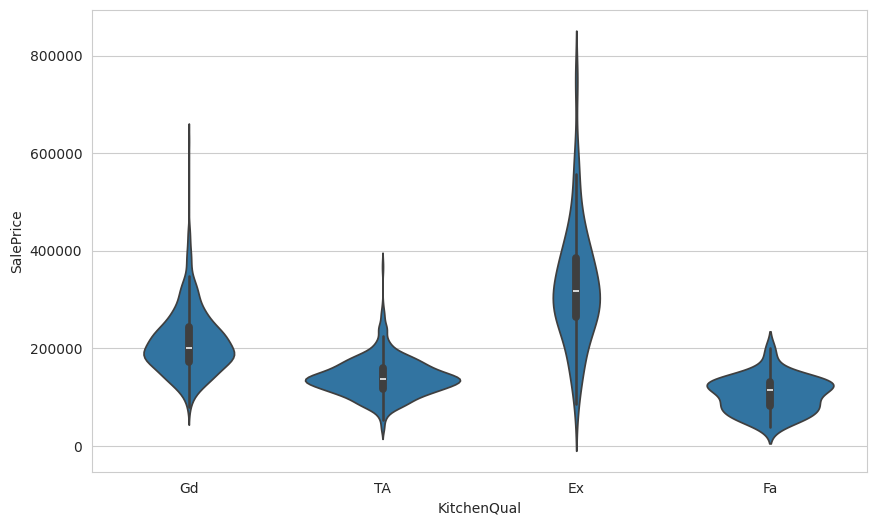

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'KitchenQual', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_KitchenQual(KitchenQual):
    if KitchenQual == 'Ex':
        return 1
    elif KitchenQual == 'Gd':
        return 2
    elif KitchenQual == 'TA':
        return 3
    elif KitchenQual == 'Fa':
        return 4

In [ ]:
df_6['LO_KitchenQual'] = df_6['KitchenQual'].apply(Fungsi_KitchenQual)

Functional

<Axes: xlabel='Functional', ylabel='SalePrice'>

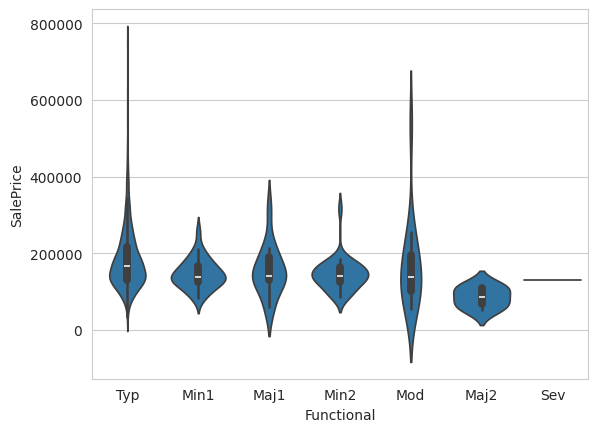

In [ ]:
plt.figure()
sns.violinplot(x = 'Functional', y = 'SalePrice', data = df_6)

In [ ]:
harga_rata_rata = df_6.groupby('Functional')['SalePrice'].mean().sort_values(ascending = False)
harga_rata_rata

,SalePrice
Functional,
Typ,183429.147059
Mod,168393.333333
Maj1,153948.142857
Min1,146385.483871
Min2,144240.647059
Sev,129000.000000
Maj2,85800.000000


In [ ]:
def Fungsi_Functional(Functional):
    if Functional == 'Typ':
        return 1
    elif Functional == 'Mod':
        return 2
    elif Functional == 'Maj1':
        return 3
    elif Functional == 'Min1' or Functional == 'Min2':
        return 4
    elif Functional == 'Sev':
        return 5
    elif Functional == 'Maj2':
        return 6

In [ ]:
df_6['LO_Func'] = df_6['Functional'].apply(Fungsi_Functional)

FireplaceQu

In [ ]:
df_6['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [ ]:
df_6['FireplaceQu'] = df_6['FireplaceQu'].fillna('No_Fireplace')

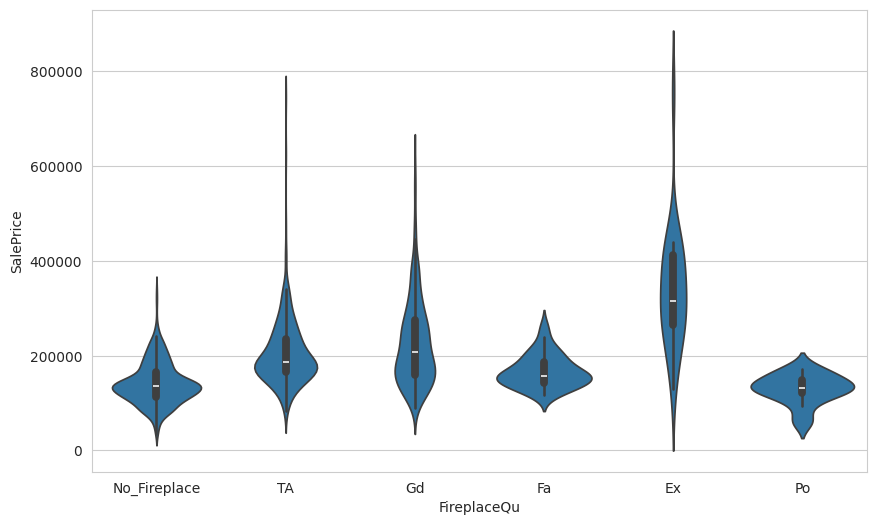

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'FireplaceQu', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
harga_rata_rata = df_6.groupby('FireplaceQu')['SalePrice'].mean().sort_values(ascending = False)
harga_rata_rata

,SalePrice
FireplaceQu,
Ex,337712.500000
Gd,226351.415789
TA,205723.488818
Fa,167298.484848
No_Fireplace,141331.482609
Po,129764.150000


In [ ]:
def Fungsi_FireplaceQu(FireplaceQu):
    if FireplaceQu == 'Ex':
        return 1
    elif FireplaceQu == 'Gd':
        return 2
    elif FireplaceQu == 'TA':
        return 3
    elif FireplaceQu == 'Fa':
        return 4
    elif FireplaceQu == 'No_Fireplace':
        return 5
    elif FireplaceQu == 'Po':
        return 6

In [ ]:
df_6['LO_FireplaceQu'] = df_6['FireplaceQu'].apply(Fungsi_FireplaceQu)

GarageType

In [ ]:
df_6['GarageType']= df_6['GarageType'].fillna('No_Garage')

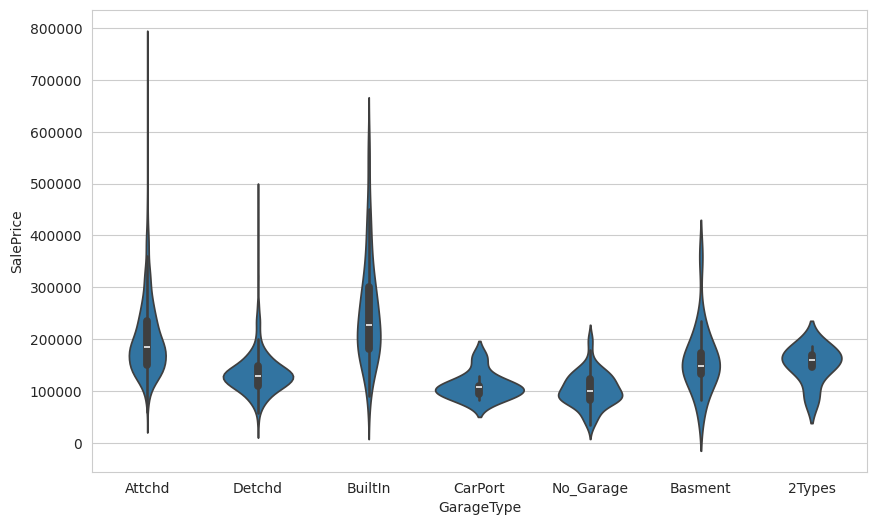

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'GarageType', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
harga_rata_rata = df_6.groupby('GarageType')['SalePrice'].mean().sort_values(ascending = False)
harga_rata_rata

,SalePrice
GarageType,
BuiltIn,254751.738636
Attchd,202892.656322
Basment,160570.684211
2Types,151283.333333
Detchd,134091.162791
CarPort,109962.111111
No_Garage,103317.283951


In [ ]:
def Fungsi_GarageType(GarageType):
    if GarageType == 'BuiltIn':
        return 1
    elif GarageType == 'Attchd':
        return 2
    elif GarageType == 'Basment':
        return 3
    elif GarageType == '2Types':
        return 4
    elif GarageType == 'Detchd':
        return 5
    elif GarageType == 'CarPort':
        return 6
    else:
        return 7

In [ ]:
df_6['LO_GarageType'] = df_6['GarageType'].apply(Fungsi_GarageType)

GarageFinish

In [ ]:
df_6['GarageFinish'].value_counts()

,count
GarageFinish,
Unf,605
RFn,422
Fin,352


In [ ]:
df_6['GarageFinish'] = df_6['GarageFinish'].fillna('No_Garage')

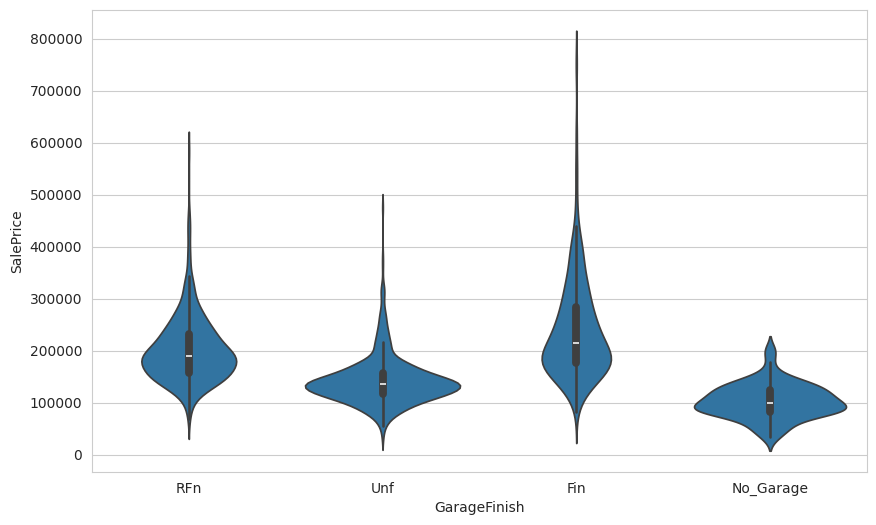

In [ ]:
plt.figure(figsize=(10, 6)) #plt.figure(figsize = (10,6))
sns.violinplot(x = 'GarageFinish', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
def Fungsi_GarageFinish(GarageFinish):
    if GarageFinish == 'Fin':
        return 1
    elif GarageFinish == 'RFn':
        return 2
    elif GarageFinish == 'Unf':
        return 3
    else:
        return 4

In [ ]:
df_6['LO_GarageFinish'] = df_6['GarageFinish'].apply(Fungsi_GarageFinish)

GarageQual

In [ ]:
df_6['GarageQual'] = df_6['GarageQual'].fillna("No_Garage")

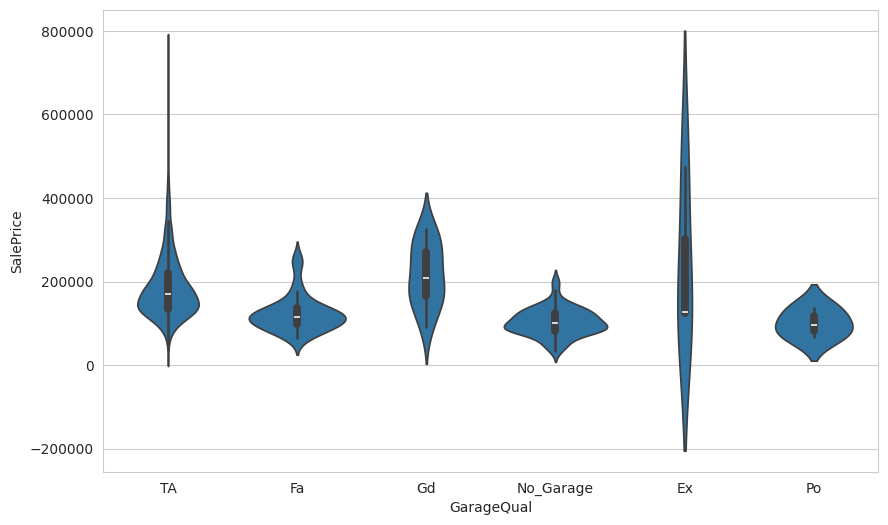

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'GarageQual', y = "SalePrice", data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
harga_rata_rata = df_6.groupby('GarageQual')['SalePrice'].mean().sort_values(ascending = False)
harga_rata_rata

,SalePrice
GarageQual,
Ex,241000.000000
Gd,215860.714286
TA,187489.836003
Fa,123573.354167
No_Garage,103317.283951
Po,100166.666667


In [ ]:
def Fungsi_GarageQual(GarageQual):
    if GarageQual == 'Ex':
        return 1
    elif GarageQual == 'Gd':
        return 2
    elif GarageQual == 'TA':
        return 3
    elif GarageQual == 'Fa':
        return 4
    elif GarageQual == 'Po':
        return 5
    else:
        return 6

In [ ]:
df_6['LO_GarageQual'] = df_6['GarageQual'].apply(Fungsi_GarageQual)

GarageCond

In [ ]:
df_6['GarageCond'] = df_6['GarageCond'].fillna('No_Garage')

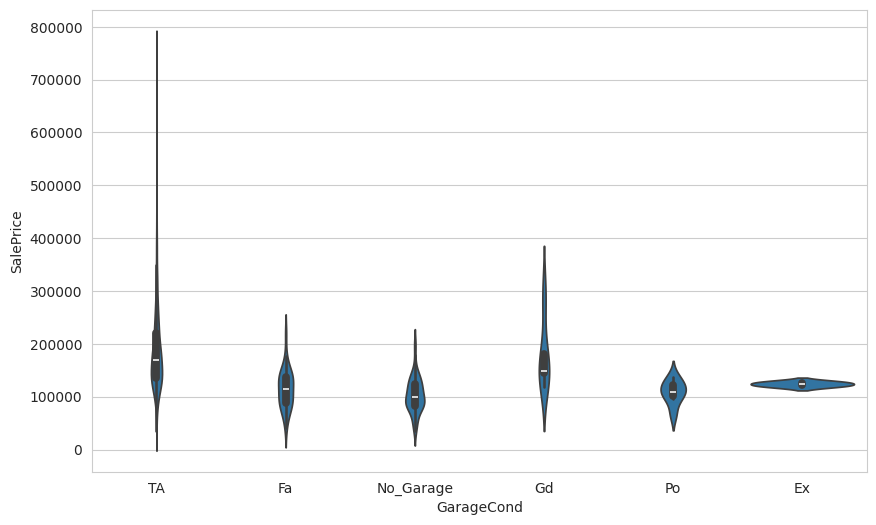

In [ ]:
plt.figure(figsize =(10,6))
sns.violinplot(x = 'GarageCond', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_6.groupby('GarageCond')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
GarageCond,
TA,187885.735294
Gd,179930.000000
Ex,124000.000000
Fa,114654.028571
Po,108500.000000
No_Garage,103317.283951


In [ ]:
# Menkipun begitu, kita tatap akan mengurutkan berdasarkan urutan kualitas yang sewajarnya / Ex paling atas
def Fungsi_GarageCond(GarageCond):
    if GarageCond == 'Ex':
        return 1
    elif GarageCond == 'Gd':
        return 2
    elif GarageCond == 'TA':
        return 3
    elif GarageCond == 'Fa':
        return 4
    elif GarageCond == 'Po':
        return 5
    else:
        return 6

In [ ]:
df_6['LO_GarageCond'] = df_6['GarageCond'].apply(Fungsi_GarageCond)

PavedDrive

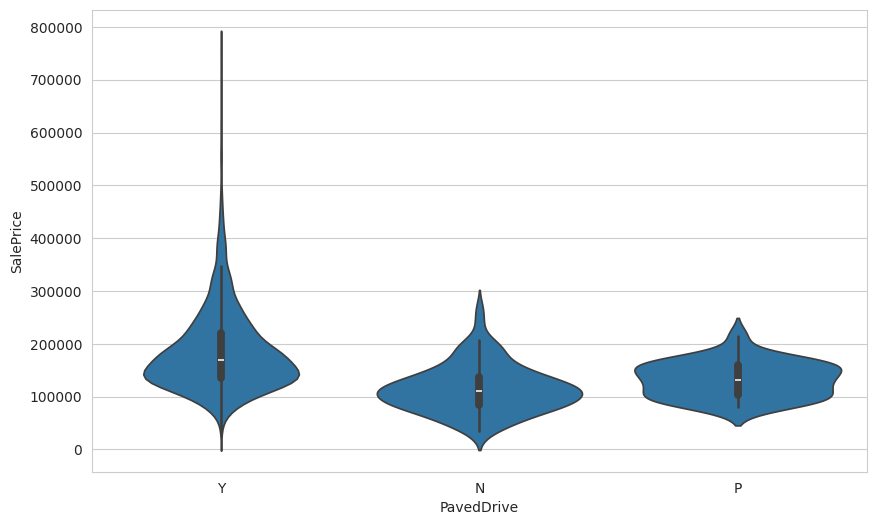

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'PavedDrive', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
df_6['LO_PavedDrive'] = df_6['PavedDrive'].map({'Y': 1, 'P': 2, 'N': 3})

PoolQC

In [ ]:
df_6['PoolQC'] = df_6['PoolQC'].fillna('No_Pool')

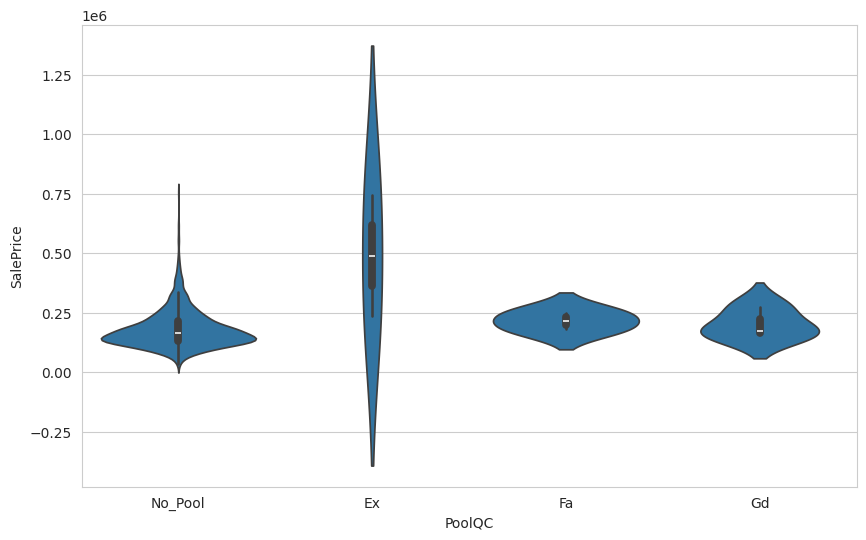

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'PoolQC', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
df_6['LO_PoolQC'] = df_6['PoolQC'].map({'Ex':1, 'Gd': 2, 'Fa':3 , 'No_Pool': 4})

Fence

In [ ]:
df_6['Fence'] = df_6['Fence'].fillna('No_Fence')

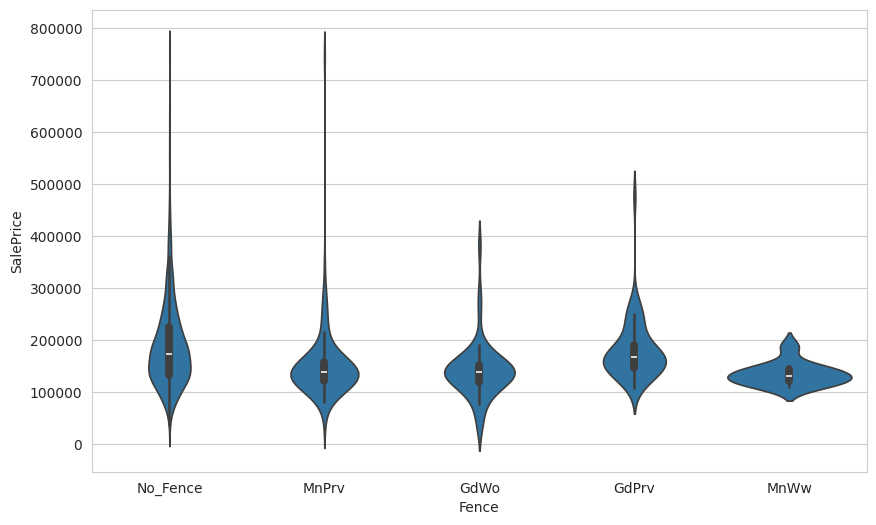

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Fence', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_6.groupby('Fence')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
Fence,
No_Fence,187596.837998
GdPrv,178927.457627
MnPrv,148751.089172
GdWo,140379.314815
MnWw,134286.363636


In [ ]:
pemetaan = {
            'No_Fence': 1,
            'GdPrv': 2,
            'MnPrv': 3,
            'GdWo': 4,
            'MnWw': 5,
            }
df_6['LO_Fence'] = df_6['Fence'].map(pemetaan)

MiscFeature

In [ ]:
df_6['MiscFeature'] = df_6['MiscFeature'].fillna('No_Misc')

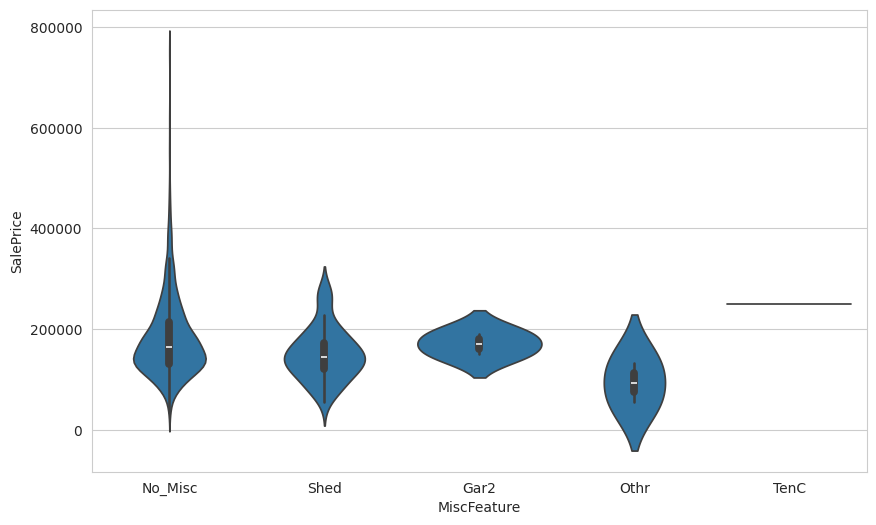

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'MiscFeature', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
pemetaan = {
            'TenC': 1,
            'Gar2': 2,
            'No_Misc': 3,
            'Shed': 4,
            'Othr': 5,
            }

In [ ]:
df_6['LO_MiscFeature'] = df_6['MiscFeature'].map(pemetaan)

SaleType

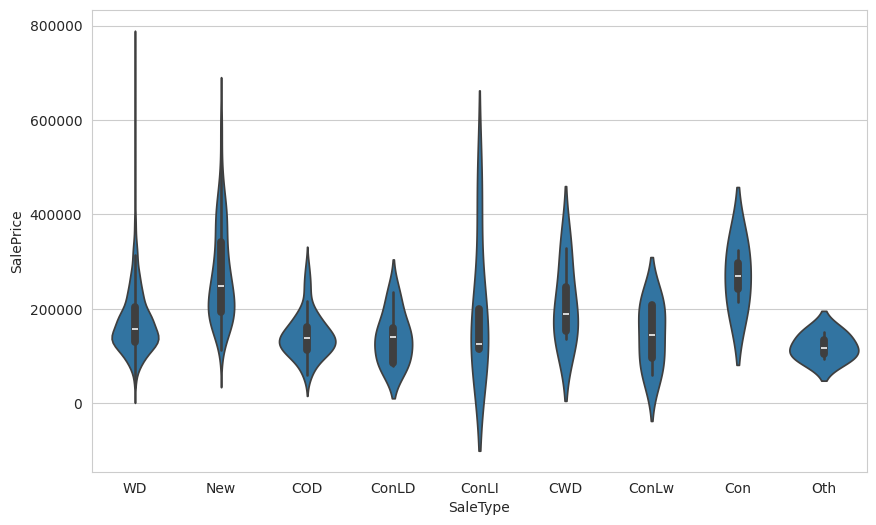

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'SaleType', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
rata_rata_harga = df_6.groupby('SaleType')['SalePrice'].mean().sort_values(ascending = False)
rata_rata_harga

,SalePrice
SaleType,
New,274945.418033
Con,269600.000000
CWD,210600.000000
ConLI,200390.000000
WD,173401.836622
COD,143973.255814
ConLw,143700.000000
ConLD,138780.888889
Oth,119850.000000


In [ ]:
def Fungsi_SaleType(SaleType):
    if SaleType == 'New' or SaleType == 'Con':
        return 1
    elif SaleType == 'CWD':
        return 2
    elif SaleType == 'ConLI':
        return 3
    elif SaleType == 'WD' or SaleType == 'ConLw':
        return 4
    elif SaleType == 'ConLD':
        return 5
    else:
        return 6

In [ ]:
df_6['SaleType'] = df_6['SaleType'].apply(Fungsi_SaleType)


SaleCondition

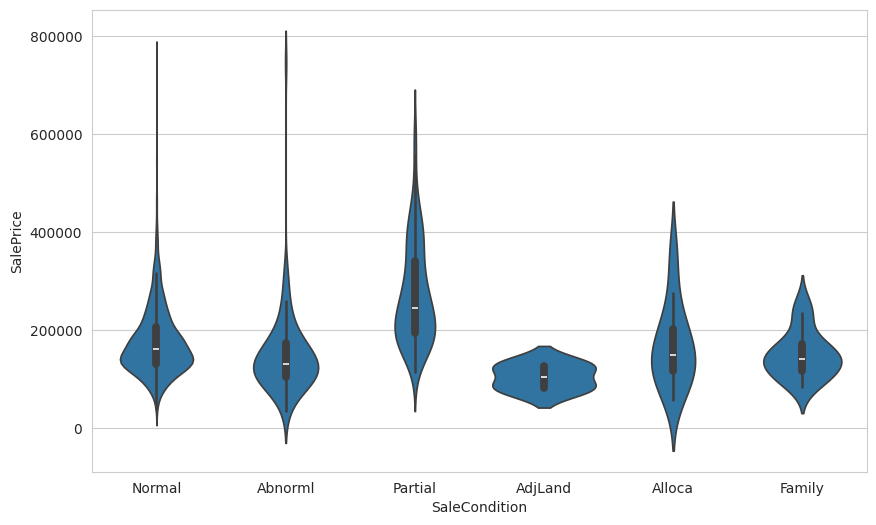

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'SaleCondition', y = 'SalePrice', data = df_6)
sns.set_style('whitegrid')
plt.show()

In [ ]:
harga_rata_rata = df_6.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending = False)
harga_rata_rata

,SalePrice
SaleCondition,
Partial,272291.752000
Normal,175202.219533
Alloca,167377.416667
Family,149600.000000
Abnorml,146526.623762
AdjLand,104125.000000


In [ ]:
pemetaan = {
    'Partial': 1,
    'Normal': 2,
    'Alloca': 3,
    'Family': 4,
    'Abnorml': 5,
    'AdjLand': 6
}


In [ ]:
df_6['LO_SaleCondition'] = df_6['SaleCondition'].map(pemetaan)

In [ ]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 97 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1460 non-null   float64
 1   LotArea           1460 non-null   int64  
 2   LotConfig         1460 non-null   object 
 3   LandSlope         1460 non-null   object 
 4   Neighborhood      1460 non-null   object 
 5   Condition1        1460 non-null   object 
 6   Condition2        1460 non-null   object 
 7   BldgType          1460 non-null   object 
 8   HouseStyle        1460 non-null   object 
 9   OverallQual       1460 non-null   int64  
 10  YearBuilt         1460 non-null   int64  
 11  YearRemodAdd      1460 non-null   int64  
 12  RoofStyle         1460 non-null   object 
 13  RoofMatl          1460 non-null   int64  
 14  Exterior1st       1460 non-null   object 
 15  Exterior2nd       1460 non-null   object 
 16  MasVnrType        1460 non-null   object 


In [ ]:
df_7 = df_6.select_dtypes(include = ('int64', 'float64'))

In [ ]:
df_7.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_7.csv', index = False)

In [ ]:
df_7 = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/df_7.csv')

In [ ]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1460 non-null   float64
 1   LotArea           1460 non-null   int64  
 2   OverallQual       1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   RoofMatl          1460 non-null   int64  
 6   MasVnrArea        1460 non-null   float64
 7   BsmtFinSF1        1460 non-null   int64  
 8   BsmtUnfSF         1460 non-null   int64  
 9   TotalBsmtSF       1460 non-null   int64  
 10  1stFlrSF          1460 non-null   int64  
 11  2ndFlrSF          1460 non-null   int64  
 12  GrLivArea         1460 non-null   int64  
 13  BsmtFullBath      1460 non-null   int64  
 14  FullBath          1460 non-null   int64  
 15  HalfBath          1460 non-null   int64  
 16  TotRmsAbvGrd      1460 non-null   int64  


#5. Train Test Val Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= df_7.drop('SalePrice', axis = 1)
y = df_7['SalePrice']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    x, y, test_size = 0.3, random_state = 42)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 42
)

#6. Modelling

### 6. 0. Linear Regression (Baseline Model)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Latih model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# simpan model
import joblib
joblib.dump(model, '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/LinearRegression_HousePricing.pkl')

['/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/LinearRegression_HousePricing.pkl']

In [ ]:
# Fungsi untuk menghitung MAPE
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Buat berapa akurasi pada data Train
y_pred_train = model.predict(X_train)
mape_train = calculate_mape(y_train, y_pred_train)
print(f"MAPE pada data train: {mape_train}")

MAPE pada data train: 12.144622670669614


In [ ]:
# Buat prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Hitung dan cetak nilai MAPE dan R-squared pada data Test
mape = calculate_mape(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAPE:", mape)
print("R-squared:", r2)

MAPE: 10.549908966794044
R-squared: 0.9057127672247681


Model Linear Regression cukup baik dalam memprediksi data testing
MAPE Training: 12.14 %
MAPE Testing : 10.55 %

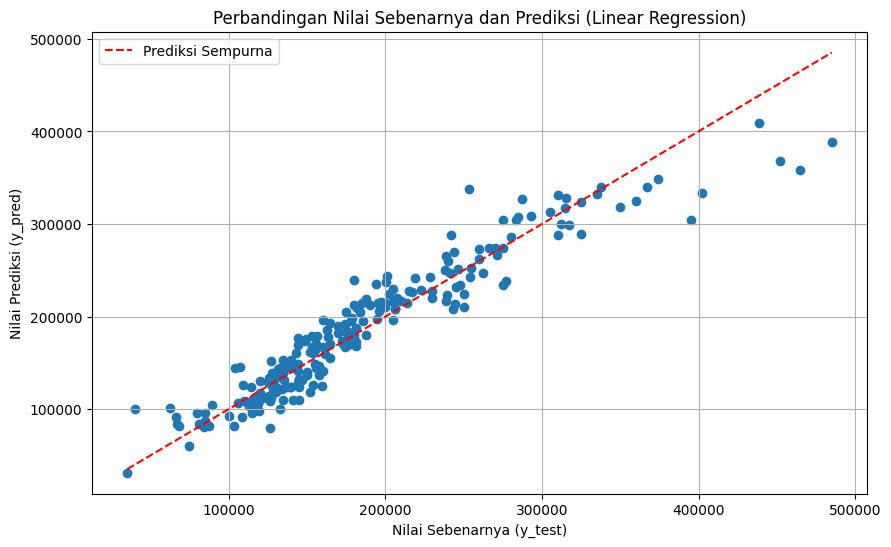

In [ ]:
#scatterplot
# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

# Tambahkan garis diagonal untuk referensi (prediksi sempurna)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Prediksi Sempurna')

# Tambahkan label sumbu dan judul
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Nilai Prediksi (y_pred)")
plt.title("Perbandingan Nilai Sebenarnya dan Prediksi (Linear Regression)")

# Tambahkan legenda
plt.legend()

# Tambahkan grid untuk memudahkan pembacaan
plt.grid(True)

# Tampilkan plot
plt.show()

Semakin rapat pada garis, berarti model semakin baik dalam memprediksi nilai aktual.

##6.A. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

###Plotting MAPE Rate and N Estimator

In [ ]:
mape_rates = []
n_estimators_range = range(1, 100)  # Mencoba n_estimators dari 1 hingga 20

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in n_estimators_range:
    model = RandomForestRegressor(n_estimators=i, random_state=42)  # Tambahkan random_state untuk reproducibility
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# Gabungkan n_estimators dan MAPE ke dalam DataFrame untuk memudahkan pengurutan
results_df = pd.DataFrame({'n_estimators': n_estimators_range, 'MAPE': mape_rates})

# Urutkan DataFrame berdasarkan nilai MAPE dari terkecil ke terbesar
best_results_n_estimator = results_df.sort_values(by='MAPE').head(3)
best_results_n_estimator

,n_estimators,MAPE
92,93,9.078886
93,94,9.088506
95,96,9.097093


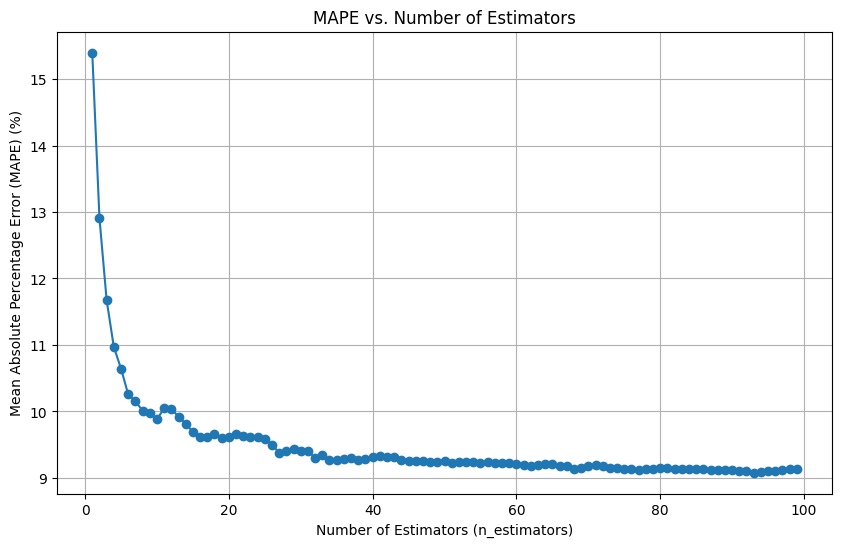

In [ ]:
# Plotting MAPE vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mape_rates, marker='o')
plt.title('MAPE vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Absolute Percentage Error (MAPE) (%)')
plt.grid(True)
plt.show()

###Plotting MAPE Rate and Max Depth

In [ ]:
mape_rates = []
max_depth_values = [None] + list(range(1, 31))

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in max_depth_values:
    model = RandomForestRegressor(max_depth=i, random_state=42)  # Tambahkan random_state untuk reproducibility
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# Gabungkan max_depth_values dan MAPE ke dalam DataFrame untuk memudahkan pengurutan
results_df = pd.DataFrame({'max_depth_value': max_depth_values, 'MAPE': mape_rates})

# Urutkan DataFrame berdasarkan nilai MAPE dari terkecil ke terbesar
best_results_max_depth = results_df.sort_values(by='MAPE').head(3)
best_results_max_depth

,max_depth_value,MAPE
19,19.0,9.061813
16,16.0,9.072564
20,20.0,9.101903


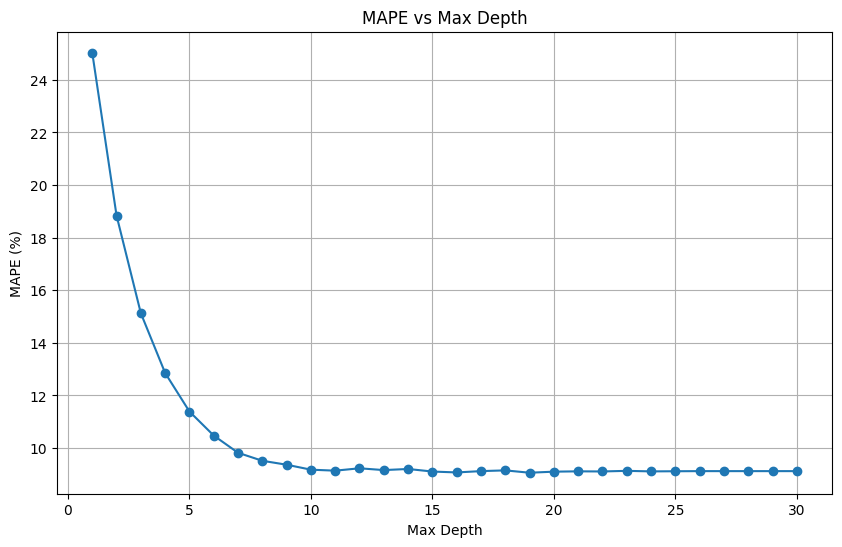

In [ ]:
# Plotting MAPE vs max_depth
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, mape_rates, marker = 'o')
plt.title("MAPE vs Max Depth")
plt.xlabel('Max Depth')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

### Plotting MAPE vs min_samples_split

In [ ]:
mape_rates = []
min_samples_split_range = range(2, 21)  # Mencoba min_samples_split dari 1 hingga 21 (nilai >= 2 lebih disarankan)

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in min_samples_split_range:
    model = RandomForestRegressor(min_samples_split=i, random_state=42)  # Gunakan i sebagai nilai min_samples_split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# Gabungkan min_sample_split dan MAPE ke dalam DataFrame untuk memudahkan pengurutan
results_df = pd.DataFrame({'min_sample_split': min_samples_split_range, 'MAPE': mape_rates})

# Urutkan DataFrame berdasarkan nilai MAPE dari terkecil ke terbesar
best_results_min_sample_split = results_df.sort_values(by='MAPE').head(3)
best_results_min_sample_split

,min_sample_split,MAPE
1,3,9.103018
0,2,9.122566
2,4,9.145706


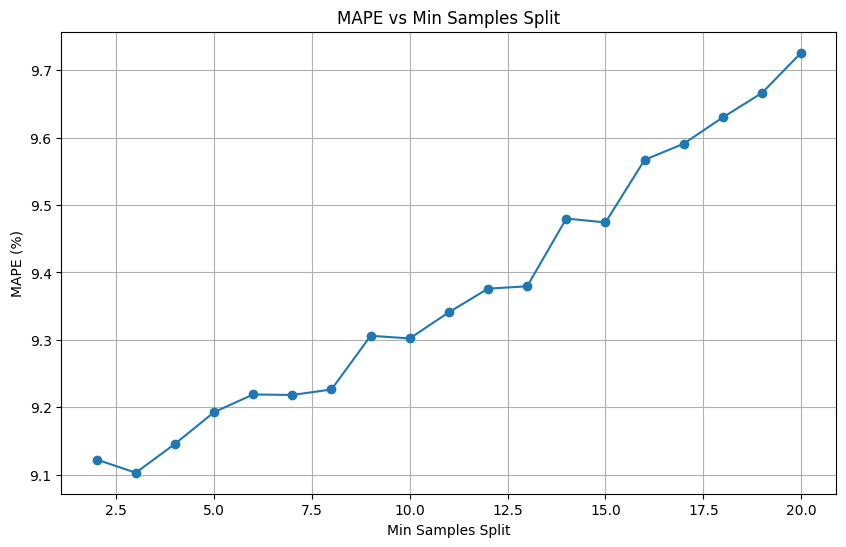

In [ ]:
# Plotting MAPE vs min sample split
plt.figure(figsize=(10,6))
plt.plot(min_samples_split_range, mape_rates, marker = 'o')
plt.title("MAPE vs Min Samples Split")
plt.xlabel('Min Samples Split')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

### MAPE vs min sample leaf

In [ ]:
mape_rates = []
min_samples_leaf_range = range(1, 10)  # Mencoba min_samples_leaf dari 1 hingga 10 (nilai >= 2 lebih disarankan)

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in min_samples_leaf_range:
    model = RandomForestRegressor(min_samples_leaf=i, random_state=42)  # Gunakan i sebagai nilai min_samples_split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# Gabungkan min_sample_leaf dan MAPE ke dalam DataFrame untuk memudahkan pengurutan
results_df = pd.DataFrame({'min_sample_leaf': min_samples_leaf_range, 'MAPE': mape_rates})

# Urutkan DataFrame berdasarkan nilai MAPE dari terkecil ke terbesar
best_results_min_sample_leaf = results_df.sort_values(by='MAPE').head(3)
best_results_min_sample_leaf

,min_sample_leaf,MAPE
1,2,9.092462
0,1,9.122566
2,3,9.214872


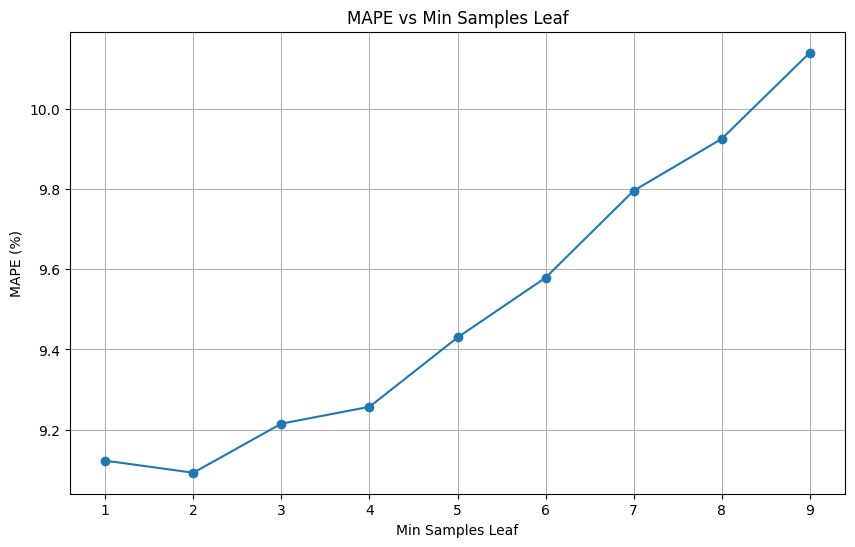

In [ ]:
# Plotting MAPE vs min sample leaf
plt.figure(figsize=(10,6))
plt.plot(min_samples_leaf_range, mape_rates, marker = 'o')
plt.title("MAPE vs Min Samples Leaf")
plt.xlabel('Min Samples Leaf')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

### Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Buat scorer untuk MAPE
mape_scorer = make_scorer(calculate_mape, greater_is_better=False) # False karena MAPE semakin kecil semakin baik

# Tentukan parameter grid
param_grid = {
    'n_estimators': [93, 94, 96],
    'max_depth': [16, 19, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Inisialisasi model RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=mape_scorer, cv=3, verbose=2, n_jobs=-1)

# Lakukan Grid Search
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik dan nilai MAPE terbaik
best_params = grid_search.best_params_
best_mape = -grid_search.best_score_  # Negatif karena GridSearchCV mengoptimalkan score, bukan error

# Cetak hasil terbaik
print("Parameter Terbaik:", best_params)
print("MAPE Terbaik:", best_mape)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Parameter Terbaik: {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 93}
MAPE Terbaik: 10.615536938711033


###6.A.1. Modelling Data

In [ ]:
# Inisialisasi model Random Forest dengan hyperparameter hasil Tuning
rf_regressor = RandomForestRegressor(
    n_estimators=93,
    max_depth=19,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42  # Untuk hasil yang dapat direproduksi
)

In [ ]:
# Latih model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=2, n_estimators=93,
                      random_state=42)

In [ ]:
# MAPE data training
y_pred_train = rf_regressor.predict(X_train)
mape_train = calculate_mape(y_train, y_pred_train)
print(f"MAPE pada data train: {mape_train}")

MAPE pada data train: 4.392663770999547


In [ ]:
#Simpan Model
import joblib
joblib.dump(rf_regressor, '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/rf_regressor_HousePricing.pkl')

['/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/rf_regressor_HousePricing.pkl']

###6.A.2. Matrix Evaluation

In [ ]:
# 4. Evaluasi Model pada Data Pengujian Asli
y_pred_test = rf_regressor.predict(X_test)
mape_test = calculate_mape(y_test, y_pred_test)
print(f"MAPE pada data pengujian: {mape_test}")

MAPE pada data pengujian: 10.073259174412087


Hasil testing menunjukkan model cenderng lebih bagus pada data training.
1. MAPE Training: 4.39 %
2. MAPE Testing : 10.07 %

###6.A.3. Feature Importance

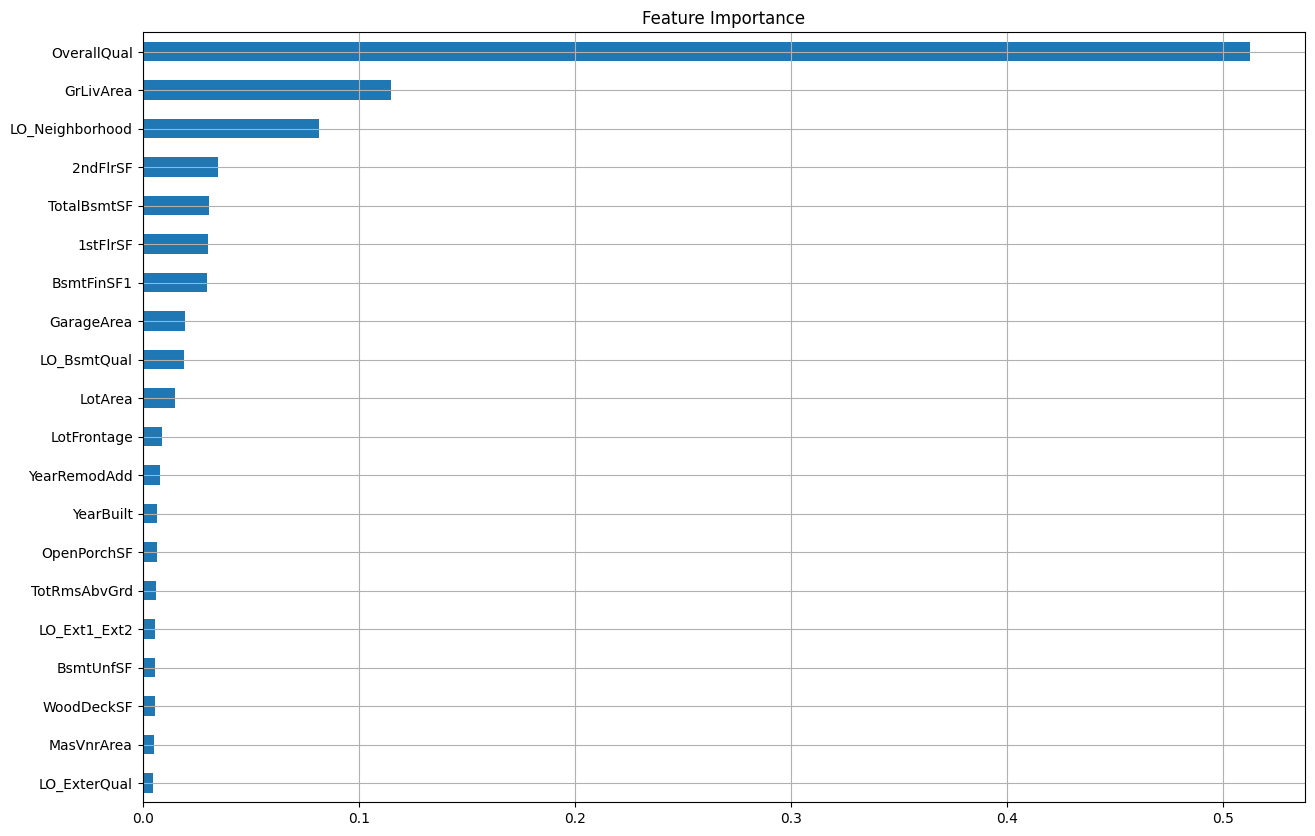

In [ ]:
importance_scores = rf_regressor.feature_importances_
feature_importances = pd.Series(importance_scores, index=x.columns) # Menggunakan x.columns sebagai indeks

plt.figure(figsize=(15, 10))
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

##6.B. XGBoost

In [ ]:
# instal library for xgbrf
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

ETA  / Learning Rate

In [ ]:
# Search Space of eta 0.001 - 1

mape_rates = []
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in learning_rate_list:
    model = RandomForestRegressor(min_samples_leaf=i, random_state=42)  # Gunakan i sebagai nilai learning rate list
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# Gabungkan min_sample_leaf dan MAPE ke dalam DataFrame untuk memudahkan pengurutan
results_df = pd.DataFrame({'learning_rate': learning_rate_list, 'MAPE': mape_rates})

# Urutkan DataFrame berdasarkan nilai MAPE dari terkecil ke terbesar
best_results_learning_rate = results_df.sort_values(by='MAPE').head(3)
best_results_learning_rate

,learning_rate,MAPE
0,0.001,9.092462
11,1.000,9.122566
1,0.010,10.301607


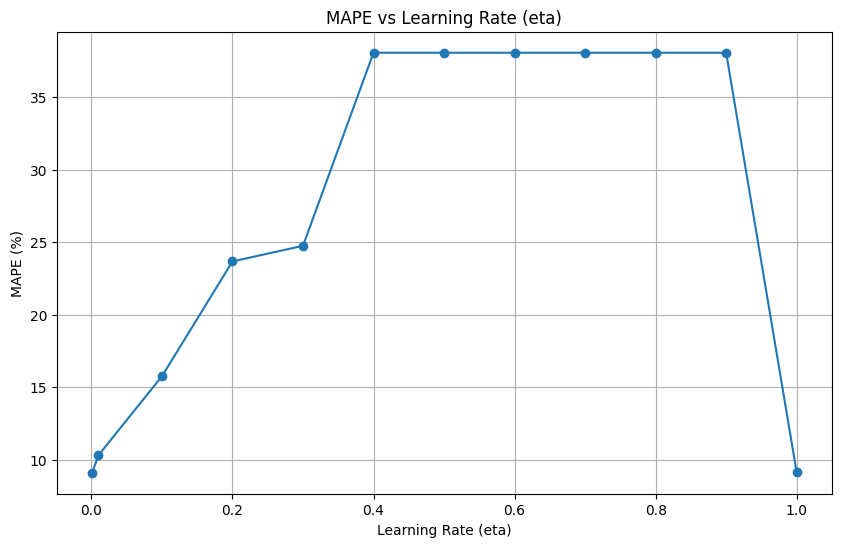

In [ ]:
# Plotting MAPE vs min sample leaf
plt.figure(figsize=(10,6))
plt.plot(learning_rate_list, mape_rates, marker = 'o')
plt.title("MAPE vs Learning Rate (eta)")
plt.xlabel('Learning Rate (eta)')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

Max Depth for XGBoost

In [ ]:
# Search Space of maxdepth is 1 - 21

mape_rates = []

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in range(1, 21):
    model = RandomForestRegressor(max_depth=i, random_state=42)  # Gunakan i sebagai nilai max_depth
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# gambugnkan max_depth dan MAPE ke dalam DF untuk memudahkan pengurutan
result_df_max_depth = pd.DataFrame({'max_depth': range(1, 21), 'MAPE': mape_rates})

# Urutkan DF berdasarkan nilai MAPE dari yang terkecil
best_result_max_depth = result_df_max_depth.sort_values(by = 'MAPE', ascending = True).head(3)
best_result_max_depth.head(3)

,max_depth,MAPE
18,19,9.061813
15,16,9.072564
19,20,9.101903


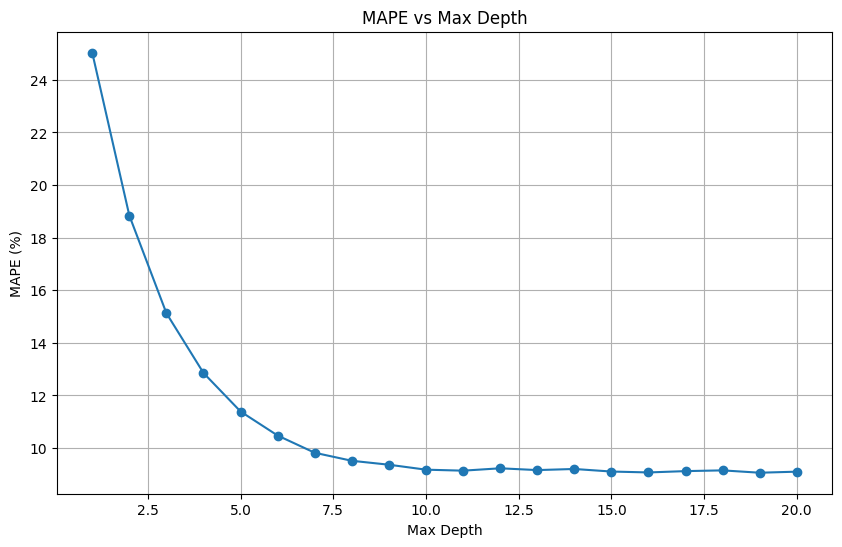

In [ ]:
# Plotting MAPE vs min sample leaf
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), mape_rates, marker = 'o')
plt.title("MAPE vs Max Depth")
plt.xlabel('Max Depth')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

N Estimator

In [ ]:
# N Estimator
mape_rates = []
n_estimator_range = kelipatan_10 = []
for i in range(1, 501):
  if i % 10 == 0:
    kelipatan_10.append(i)


for i in n_estimator_range:
    model = RandomForestRegressor(n_estimators = i, random_state=42)  # Gunakan i sebagai nilai max_depth
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# gabungkan n_estimator dan MAPE ke dalam datafrae untuk memudahkan pengurutan
result_df_n_estimators = pd.DataFrame({'n_estimator': n_estimator_range, 'MAPE': mape_rates})

# Urutkan DF berdasarkan nilai yang paling kecil
best_result_n_estimator = result_df_n_estimators.sort_values(by = 'MAPE', ascending =True)
best_result_n_estimator.head(3)

,n_estimator,MAPE
14,150,9.003032
13,140,9.023822
19,200,9.024021


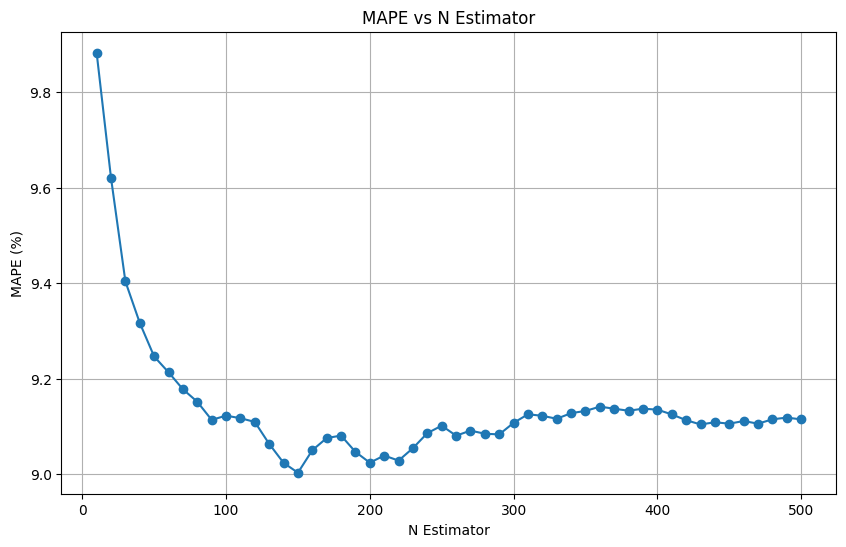

In [ ]:
# Membuat Plot
plt.figure(figsize=(10,6))
plt.plot(n_estimator_range, mape_rates, marker = 'o')
plt.title("MAPE vs N Estimator")
plt.xlabel('N Estimator')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

Subsample

In [ ]:
# Subsample
mape_rates = []
subsample_range = (0.5, 0.6, 0.7, 0.8, 0.9, 1.0)


for i in subsample_range:
    model = XGBRegressor(subsample = i, random_state=42)  # Gunakan i sebagai nilai max_depth
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)  # Hitung Mean Absolute Percentage Error
    mape_rates.append(mape)

In [ ]:
# gabungkan n_estimator dan MAPE ke dalam datafrae untuk memudahkan pengurutan
result_df_subsample = pd.DataFrame({'subsample': subsample_range, 'MAPE': mape_rates})

# Urutkan DF berdasarkan nilai yang paling kecil
best_result_subsample = result_df_subsample.sort_values(by = 'MAPE', ascending =True)
best_result_subsample.head(3)

,subsample,MAPE
2,0.7,9.334840
3,0.8,9.952385
4,0.9,9.965877


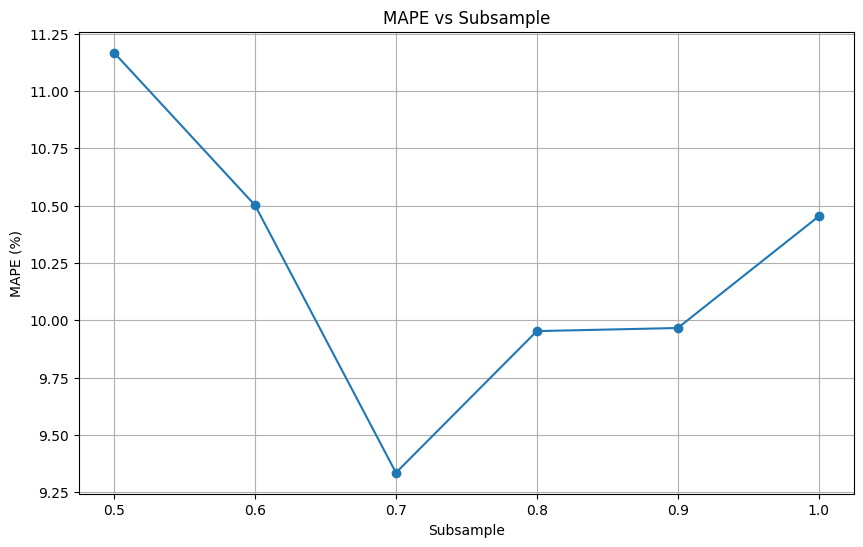

In [ ]:
# Membuat Plot
plt.figure(figsize=(10,6))
plt.plot(subsample_range, mape_rates, marker = 'o')
plt.title("MAPE vs Subsample")
plt.xlabel('Subsample')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

Lambda

In [ ]:
mape_rates = []
reg_lambda = [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2] #strength regulization l2


for lambda_ in reg_lambda:
    model = XGBRegressor(reg_lambda=lambda_,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mape = calculate_mape(y_val, y_pred)
    mape_rates.append(mape)



"    #create dataset eta\ndf_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,\n                       'rmse_score':rmse_score})"

In [ ]:
# gabungkan labda dan MAPE ke dalam dataframe untuk memudahkan pengurutan
result_df_lambda = pd.DataFrame({'lambda': reg_lambda, 'MAPE': mape_rates})

# Urutkan DF berdasarkan nilai yang paling kecil
best_result_lambda = result_df_lambda.sort_values(by = 'MAPE', ascending =True)
best_result_lambda.head(3)

,lambda,MAPE
0,0.0001,9.693574
1,0.0010,9.700685
4,0.5000,9.732061


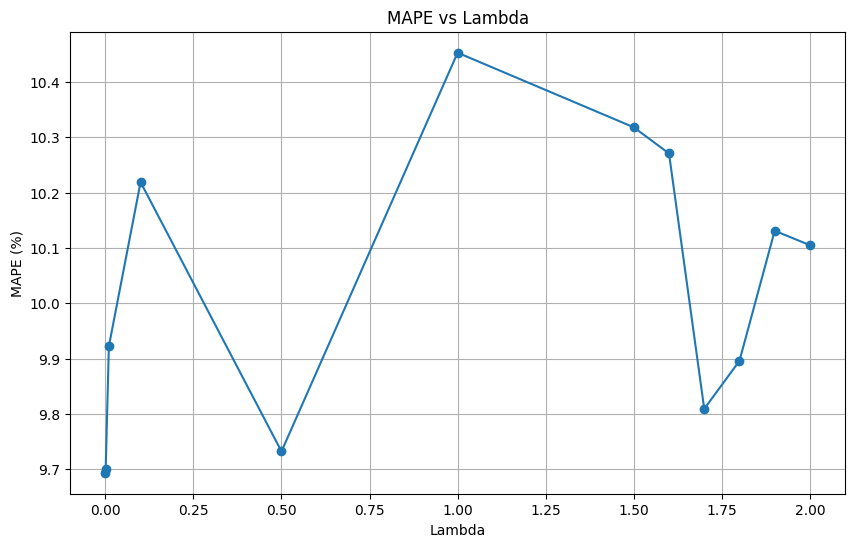

In [ ]:
# Membuat Plot
plt.figure(figsize=(10,6))
plt.plot(reg_lambda, mape_rates, marker = 'o')
plt.title("MAPE vs Lambda")
plt.xlabel('Lambda')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()

###6.B.1. Modelling Data

Berdasarkan Plotting MAPE sebelumnya, maka beberapa hyper parameter yang dijadikan pilihan tuning sbb:

* eta / learning rate: 0.001 , 1, 0.01
* max_depth; 19, 16, 20
* n_estimator: 150, 140, 200
* Subsample: 0.7, 0.8, 0.9
* Lambda: 0.0001, 0.001, 0.5



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Buat scorer untuk MAPE
mape_scorer = make_scorer(calculate_mape, greater_is_better=False) # False karena MAPE semakin kecil semakin baik

# Tentukan parameter grid
param_grid = {
    'n_estimators': [150, 140, 200],
    'max_depth': [19, 16, 20],
    'subsample': [0.7, 0.8, 0.9],
    'reg_lambda': [0.0001, 0.001, 0.5],
    'learning_rate': [0.001, 1, 0.01]
}

# Inisialisasi model XGBRegressor
XGB_regressor = XGBRegressor(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=XGB_regressor, param_grid=param_grid, scoring=mape_scorer, cv=3, verbose=2, n_jobs=-1)

# Lakukan Grid Search
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik dan nilai MAPE terbaik
best_params = grid_search.best_params_
best_mape = -grid_search.best_score_  # Negatif karena GridSearchCV mengoptimalkan score, bukan error

# Cetak hasil terbaik
print("Parameter Terbaik:", best_params)
print("MAPE Terbaik:", best_mape)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Parameter Terbaik: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200, 'reg_lambda': 0.001, 'subsample': 0.7}
MAPE Terbaik: 11.665602802801743


In [ ]:
# Train XGBoost model with the best hyperparameters
best_hyperparameters = {'learning_rate': 0.01,
                        'n_estimators': 200,
                        'max_depth': 20,
                        'reg_lambda': 0.001,
                        'subsample': 0.7}

best_xgb = XGBRegressor(**best_hyperparameters, random_state=42)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#save best_xgb
import joblib
joblib.dump(best_xgb, '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/best_xgb_HousePricing.pkl')

['/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/best_xgb_HousePricing.pkl']

###6.B.2. Matrix Evaluation

In [ ]:
# 4. Evaluasi Model pada Data Pengujian Asli
y_pred_test = best_xgb.predict(X_test)
mape_test = calculate_mape(y_test, y_pred_test)
print(f"MAPE pada data pengujian: {mape_test}")

MAPE pada data pengujian: 11.471737396404457


Hasil testing menunjukkan model cukup baik dalam data testing.
1. MAPE Training: 11.67 %
2. MAPE Testing : 11.47 %

###6.B.3. Feature Importance

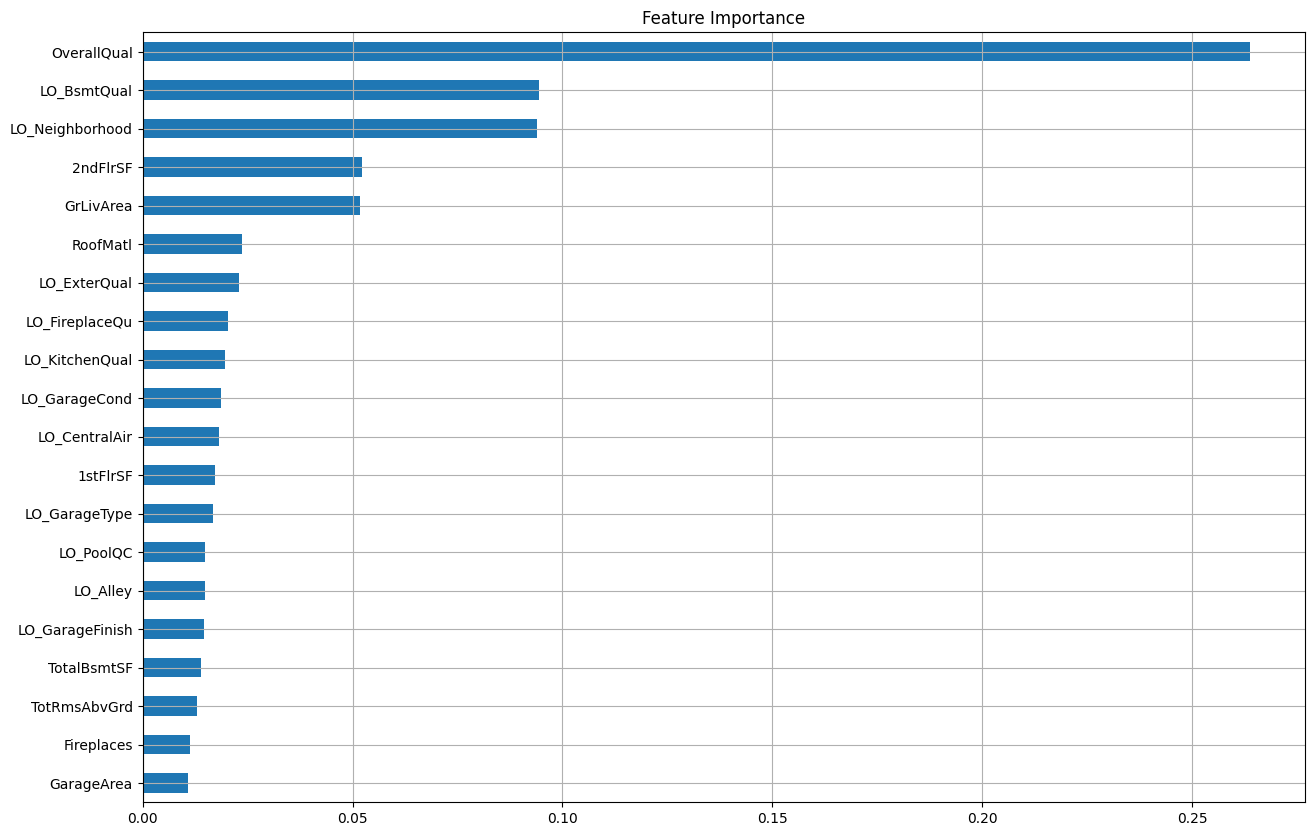

In [ ]:
importance_scores = best_xgb.feature_importances_
feature_importances = pd.Series(importance_scores, index=x.columns) # Menggunakan x.columns sebagai indeks

plt.figure(figsize=(15, 10))
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

##6.C. XGBRF

###6.C.1. Modelling Data

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
xgb = XGBRegressor(learning_rate = 0.01,
                  max_depth = 20,
                  n_estimators = 200,
                  subsample = 0.7,
                  reg_lambda = 0.001,
                  random_state=42)



rf = RandomForestRegressor(
    n_estimators=93,
    max_depth=19,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

estimators = [
    ('randomforest', rf),
 ]

XGBRF_tuning = StackingRegressor(
    estimators=estimators,
    final_estimator=xgb)

XGBRF_tuning.fit(X_train,y_train)

StackingRegressor(estimators=[('randomforest',
                               RandomForestRegressor(max_depth=19,
                                                     min_samples_leaf=2,
                                                     n_estimators=93,
                                                     random_state=42))],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric...
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.01, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=20, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))

In [ ]:
#simpan model XGBRF_model
import joblib
joblib.dump(XGBRF_tuning, '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/XGBRF_tuning_HousePricing.pkl')

['/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/Project 3: House Price Prediction/XGBRF_tuning_HousePricing.pkl']

###6.C.2. Matrix Evaluation

In [ ]:
def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# 4. Evaluasi Model pada Data Train
y_pred_train = XGBRF_tuning.predict(X_train)
mape_train = calculate_mape(y_train, y_pred_train)
print(f"MAPE pada data train: {mape_train}")

MAPE pada data train: 7.692629798436841


In [ ]:
# 4. Evaluasi Model pada Data Test
y_pred_test = XGBRF_tuning.predict(X_test)
mape_test = calculate_mape(y_test, y_pred_test)
print(f"MAPE pada data test: {mape_test}")

MAPE pada data test: 11.777443032112739


Hasil testing menunjukkan performa model menurun pada data testing.
1. MAPE Training: 7.69 %
2. MAPE Testing : 11.77 %

#Kesimpulan
Algoritma Random Forest adalah model yang paling baik dalam melakukan prediksi harga rumah.